In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
df.shape

(8425, 23)

In [4]:
#check for duplicates as dataset is too large
df.duplicated().sum()

1663

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(6762, 23)

We have reduced shape of data

# check for null values

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [9]:
#convert Date column to date type:
import datetime
df['Date'] = pd.to_datetime(df['Date'] , format = '%Y-%m-%d')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.set_index('Date' , inplace=True)

In [10]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                     
2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...             ...      ...      ...       ...          ...       ...   
2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
Date                                                         ...                
2008-12-01           W           44.0          W        WNW  ...       1007.1   
2008-12-02         WNW           44.0        NNW        WSW  ...       1007.8   
2008-12-03         WSW           46.0          W        WSW  ...       1008.7   
2008-12-04          NE           24.0         SE          E  ...       1012.8   
2008-12-05           W           41.0        ENE         NW  ...       1006.0   
...                ...            ...        ...        ...  ...          ...   
2017-06-21           E           31.0         SE        ENE  ...       1020.3   
2017-06-22         NNW           22.0         SE          N  ...       1019.1   
2017-06-23           N           37.0         SE        WNW  ...       1016.8   
2017-06-24          SE           28.0        SSE          N  ...       1016.5   
2017-06-25         NaN            NaN        ESE        ESE  ...       1017.9   

            Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
Date                                                                        
2008-12-01       8.0       NaN     16.9     21.8         No            No   
2008-12-02       NaN       NaN     17.2     24.3         No            No   
2008-12-03       NaN       2.0     21.0     23.2         No            No   
2008-12-04       NaN       NaN     18.1     26.5         No            No   
2008-12-05       7.0       8.0     17.8     29.7         No            No   
...              ...       ...      ...      ...        ...           ...   
2017-06-21       NaN       NaN     10.1     22.4         No            No   
2017-06-22       NaN       NaN     10.9     24.5         No            No   
2017-06-23       NaN       NaN     12.5     26.1         No            No   
2017-06-24       3.0       2.0     15.1     26.0         No            No   
2017-06-25       8.0       8.0     15.0     20.9         No           NaN   

            year  month  day  
Date                          
2008-12-01  2008     12    1  
2008-12-02  2008     12    2  
2008-12-03  2008     12    3  
2008-12-04  2008     12    4  
2008-12-05  2008     12    5  
...          ...    ...  ...  
2017-06-21  2017      6   21  
2017-06-22  2017      6   22  
2017-06-23  2017      6   23  
2017-06-24  2017      6   24  
2017-06-25  2017      6   25  

[6762 rows x 25 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6762 entries, 2008-12-01 to 2017-06-25
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   object 
 1   MinTemp        6692 non-null   float64
 2   MaxTemp        6705 non-null   float64
 3   Rainfall       6624 non-null   float64
 4   Evaporation    3841 non-null   float64
 5   Sunshine       3526 non-null   float64
 6   WindGustDir    5820 non-null   object 
 7   WindGustSpeed  5820 non-null   float64
 8   WindDir9am     5968 non-null   object 
 9   WindDir3pm     6468 non-null   object 
 10  WindSpeed9am   6699 non-null   float64
 11  WindSpeed3pm   6662 non-null   float64
 12  Humidity9am    6708 non-null   float64
 13  Humidity3pm    6666 non-null   float64
 14  Pressure9am    5454 non-null   float64
 15  Pressure3pm    5451 non-null   float64
 16  Cloud9am       4896 non-null   float64
 17  Cloud3pm       4860 non-null   flo

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
40.0        1
Name: Rainfall, Length: 250, dtype: int64


4.0      141
3.0      125
2.2      118
2.4      116
2.6      116
        ... 
145.0      1
33.8       1
59.2       1
20.8       1
0.7        1
Name: Evaporation, Length: 116, dtype: int64


0

In [13]:
categorical =[]
numerical = []
for i in df.columns:
    if df[i].dtypes == 'object':
        categorical.append(i)
    else:
        numerical.append(i)
print('categrical columns are : ',categorical)
print('numerical columns are : ',numerical)

categrical columns are :  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
numerical columns are :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [14]:
df[numerical].nunique()

MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustSpeed     52
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
year              10
month             12
day               31
dtype: int64

- columns with discrete data are : 'Cloud9am', 'Cloud3pm' , 'year', 'month', 'day'
- columns with continuous data are : 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm'

In [15]:
#find the percentage of missing data in every column :
missing = df.isnull().sum().sort_values(ascending=False)
percentage = (missing/len(df))*100
percen = pd.DataFrame()
percen['missing values'] = missing
percen['percentage of missing values %'] = percentage
percen

missing values  percentage of missing values %
Sunshine                 3236                       47.855664
Evaporation              2921                       43.197279
Cloud3pm                 1902                       28.127773
Cloud9am                 1866                       27.595386
Pressure3pm              1311                       19.387755
Pressure9am              1308                       19.343390
WindGustDir               942                       13.930790
WindGustSpeed             942                       13.930790
WindDir9am                794                       11.742088
WindDir3pm                294                        4.347826
RainTomorrow              138                        2.040816
RainToday                 138                        2.040816
Rainfall                  138                        2.040816
WindSpeed3pm              100                        1.478852
Humidity3pm                96                        1.419698
Temp3pm                    92                        1.360544
MinTemp                    70                        1.035197
WindSpeed9am               63                        0.931677
MaxTemp                    57                        0.842946
Humidity9am                54                        0.798580
Temp9am                    51                        0.754215
month                       0                        0.000000
Location                    0                        0.000000
year                        0                        0.000000
day                         0                        0.000000

In [16]:
# fill nan values is categorical data :
for i in categorical :
    df[i] = df[i].fillna(df[i].mode()[0])

In [17]:
len(numerical)

19

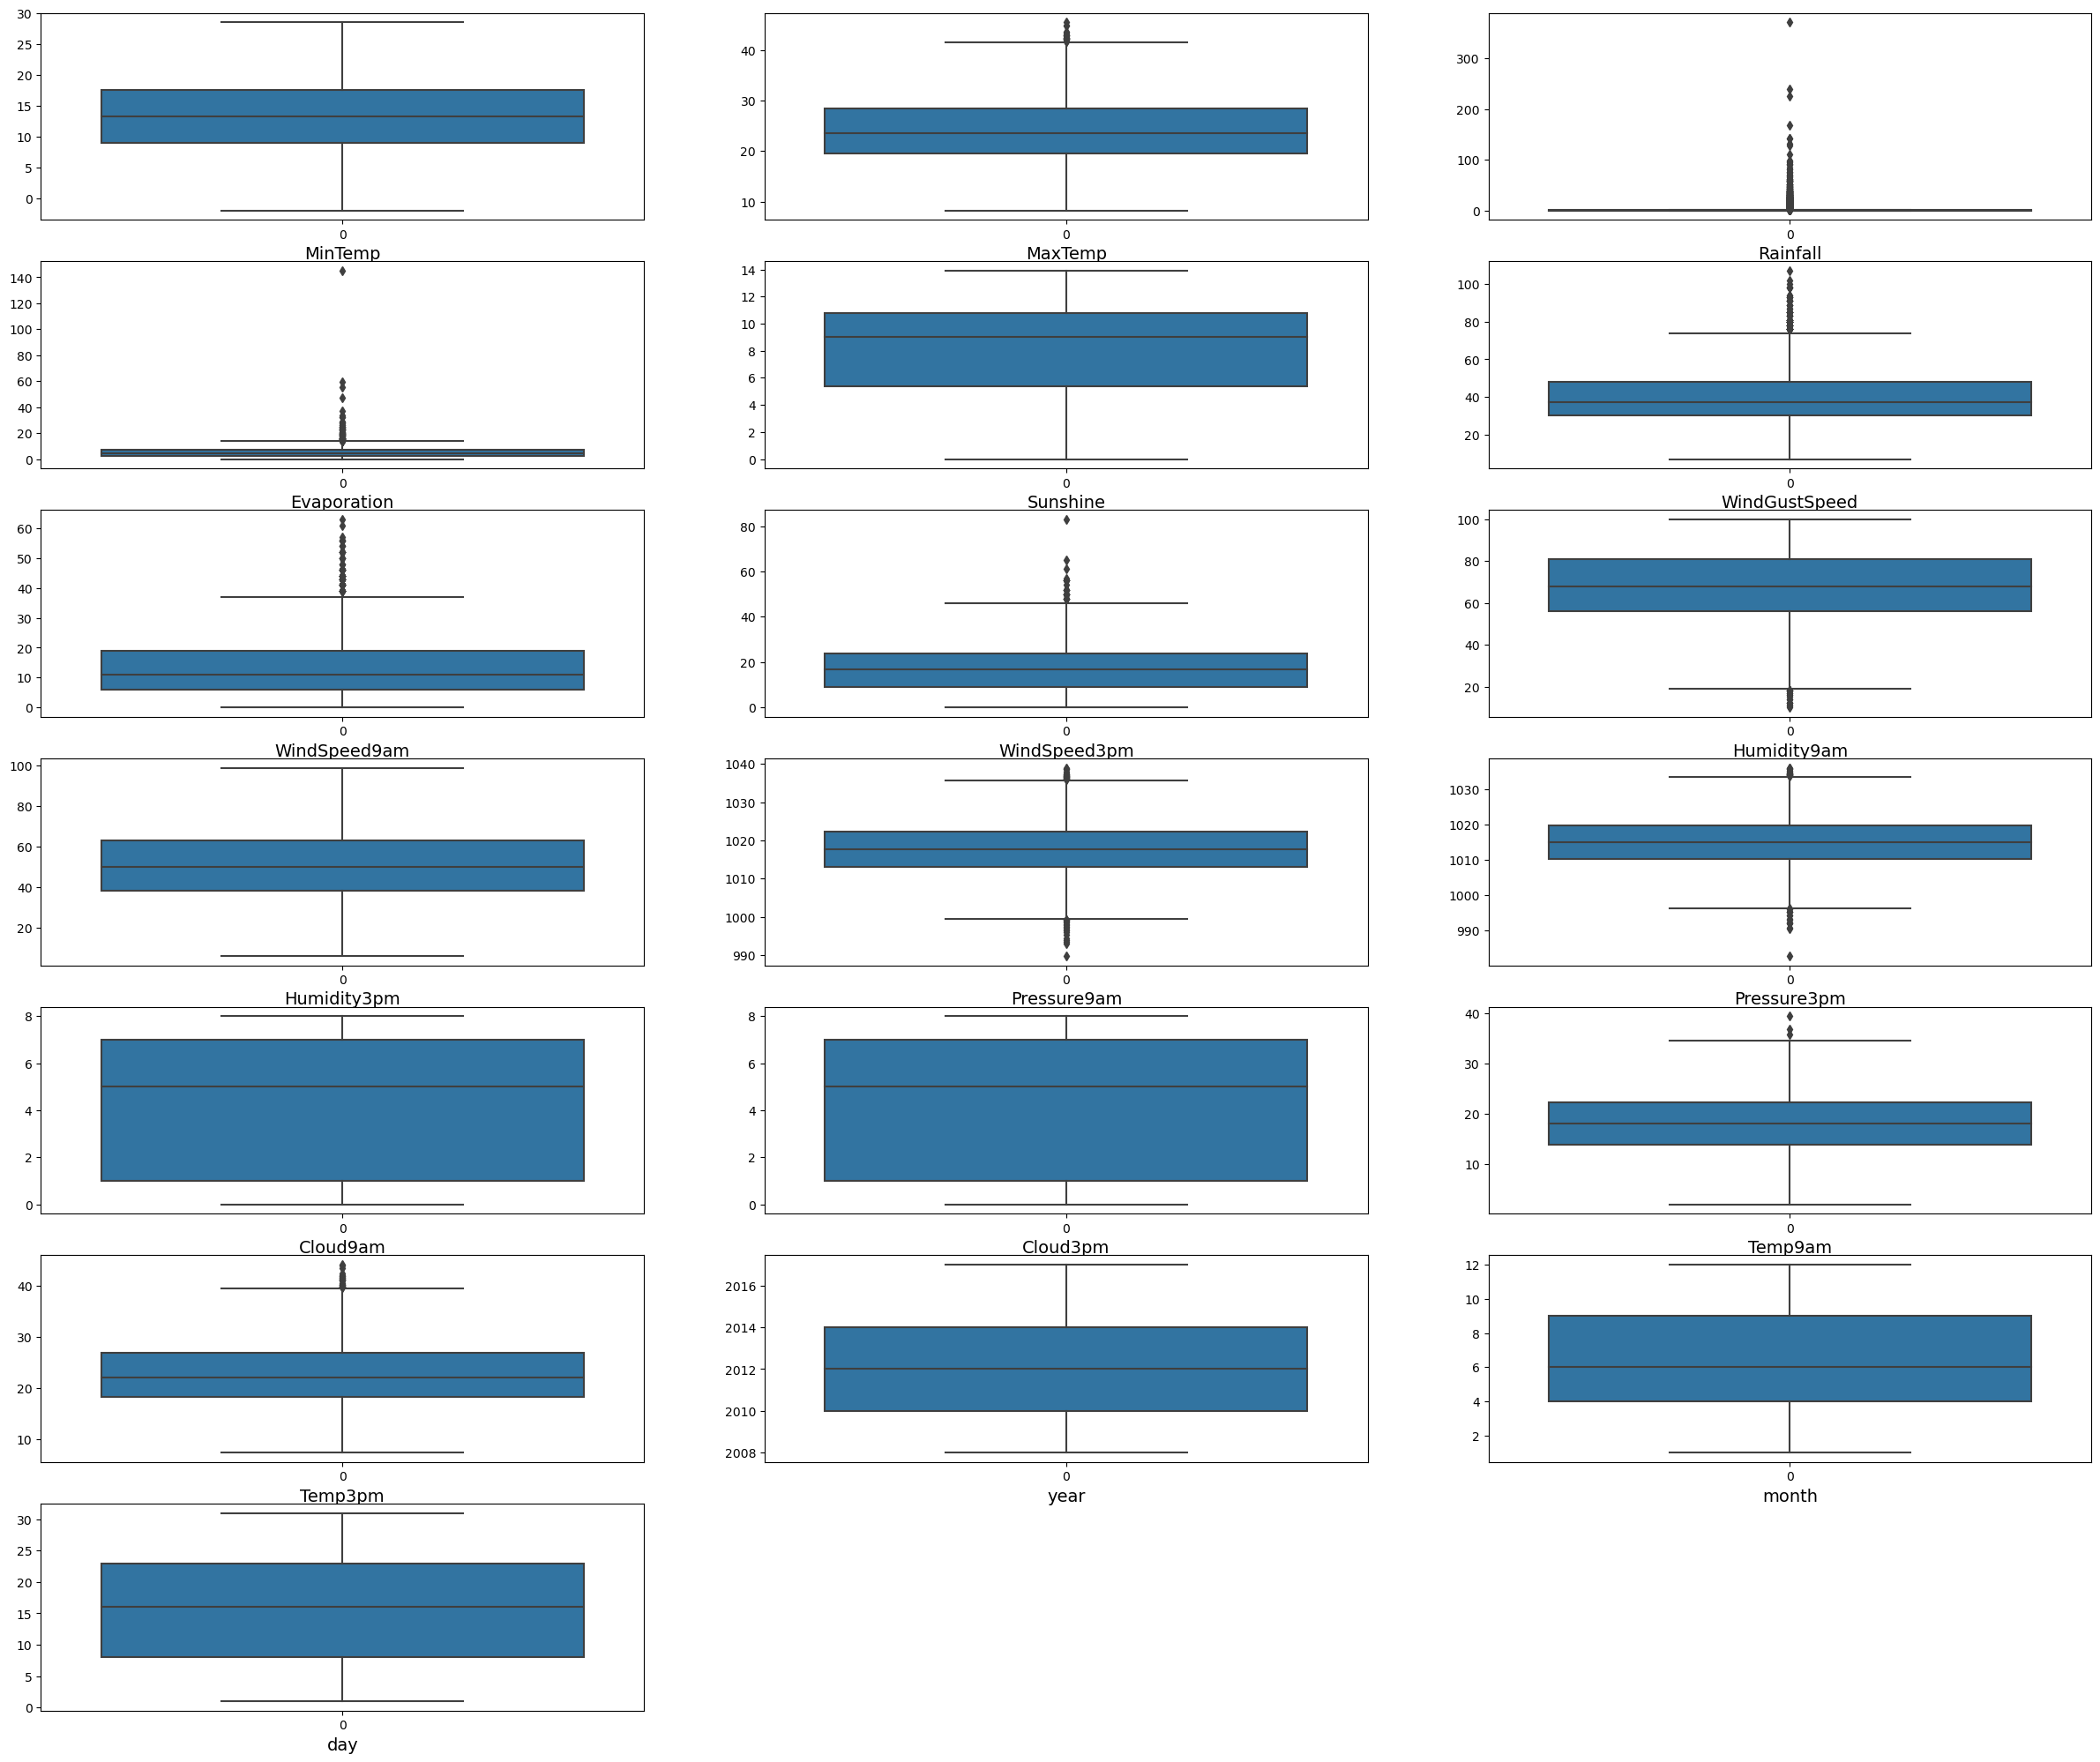

In [18]:
plt.figure(figsize=(30,25))
plot = 1
for i in numerical :
    if plot <= 19 :
        ax = plt.subplot(7,3,plot)
        sns.boxplot(df[i])
        plt.xlabel(i , fontsize=14)
    plot +=1
plt.show()    

In [19]:
# for discrete numerical columns we will use mode :
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0])

In [20]:
#for continuous numerical columns with outliers we use median to fill nan values :
median_outliers = ['MaxTemp','Rainfall', 'Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']
for i in median_outliers :
    df[i] = df[i].fillna(df[i].median())

In [21]:
#for continuous numerical columns with noo outliers we use mean to fill nan values :
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

In [22]:
#now let us check null values
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

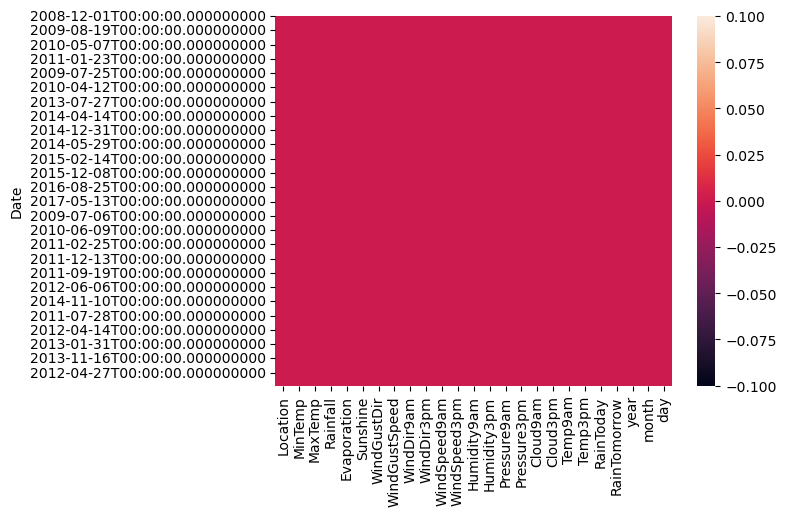

In [23]:
sns.heatmap(df.isnull())
plt.show()

We removed null values in our dataset

# Data Visualization

In [24]:
#The day the average of rainfall was the maximum
df[df['Rainfall']==df['Rainfall'].max()]

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                          
2009-11-07  CoffsHarbour     17.4     23.1     371.0          4.6       3.5   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  \
Date                                                         ...                
2009-11-07           E           37.0         SW          S  ...       1025.9   

            Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
Date                                                                        
2009-11-07       8.0       5.0     18.6     22.0        Yes           Yes   

            year  month  day  
Date                          
2009-11-07  2009     11    7  

[1 rows x 25 columns]

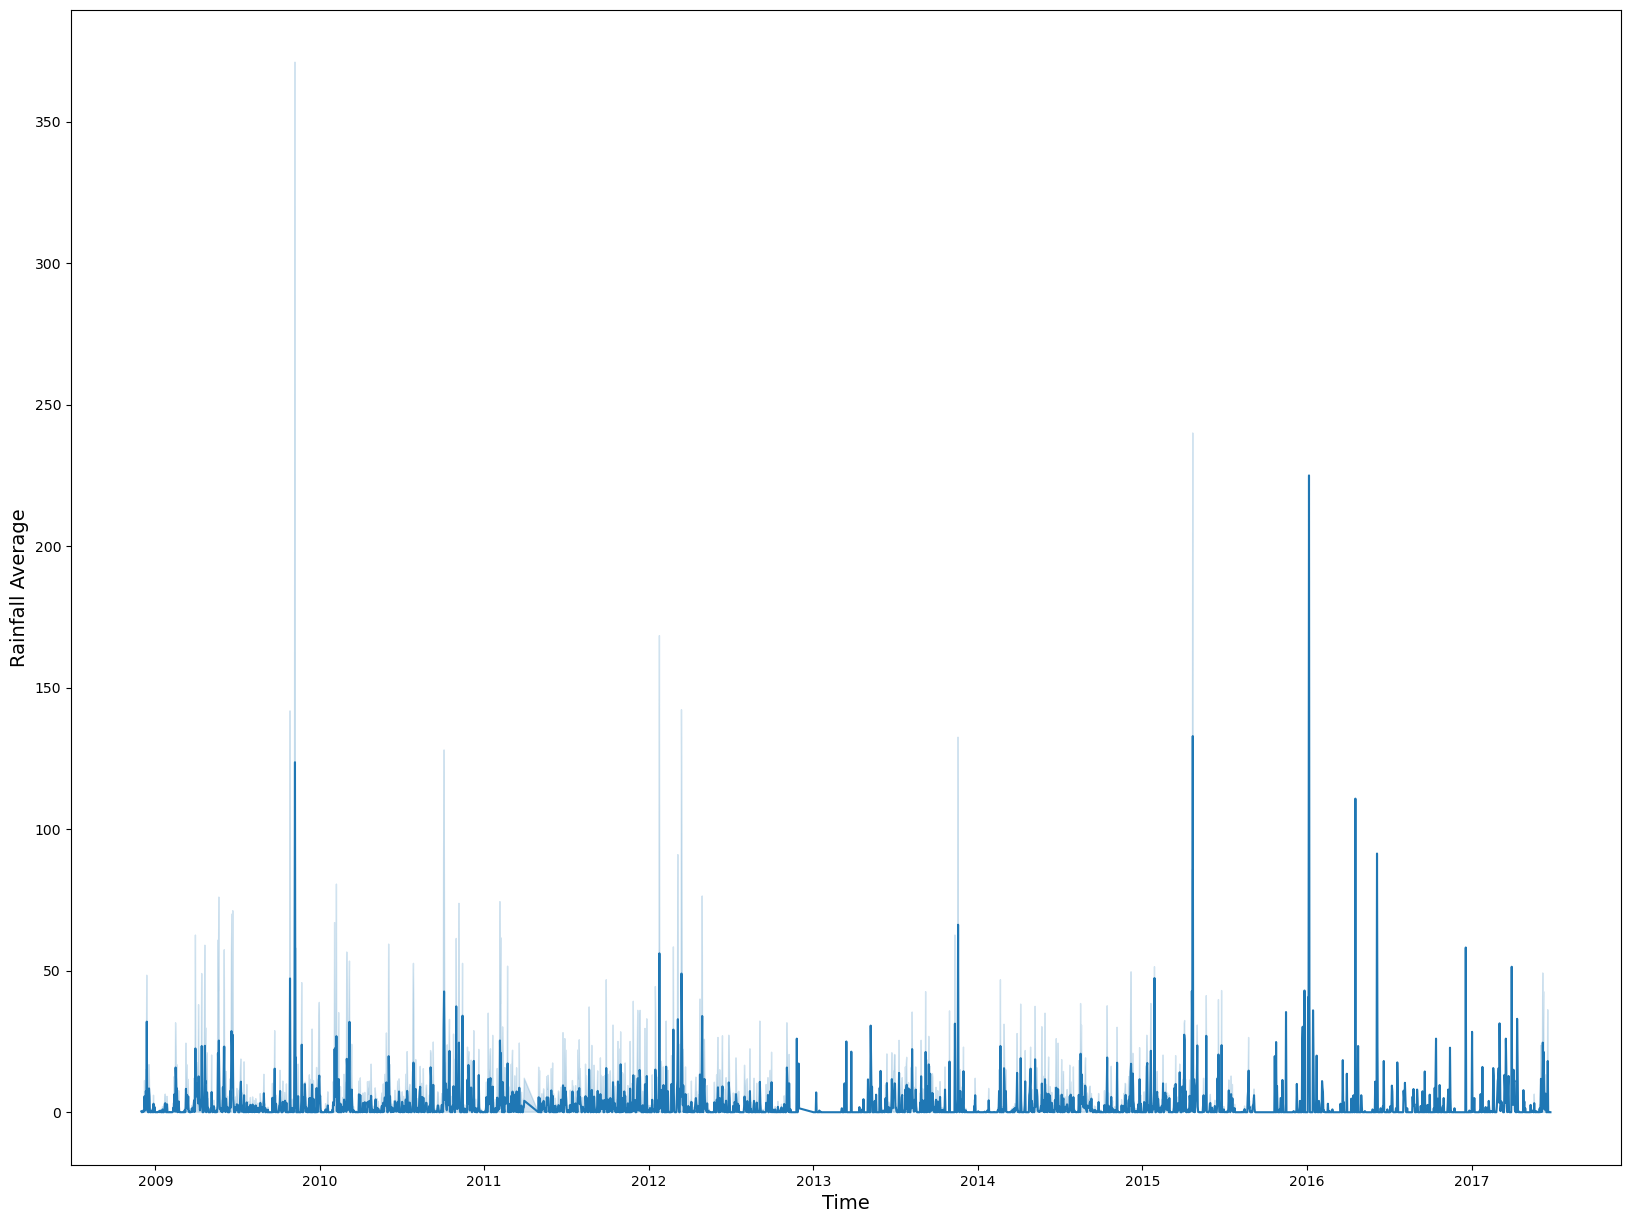

In [25]:
plt.figure(figsize=(20,15))
sns.lineplot(df['Rainfall'])
plt.xlabel('Time' , fontsize=14)
plt.ylabel('Rainfall Average' , fontsize=14)
plt.show()

- Rain fall average is the highest above 350 mm per day in november 2009

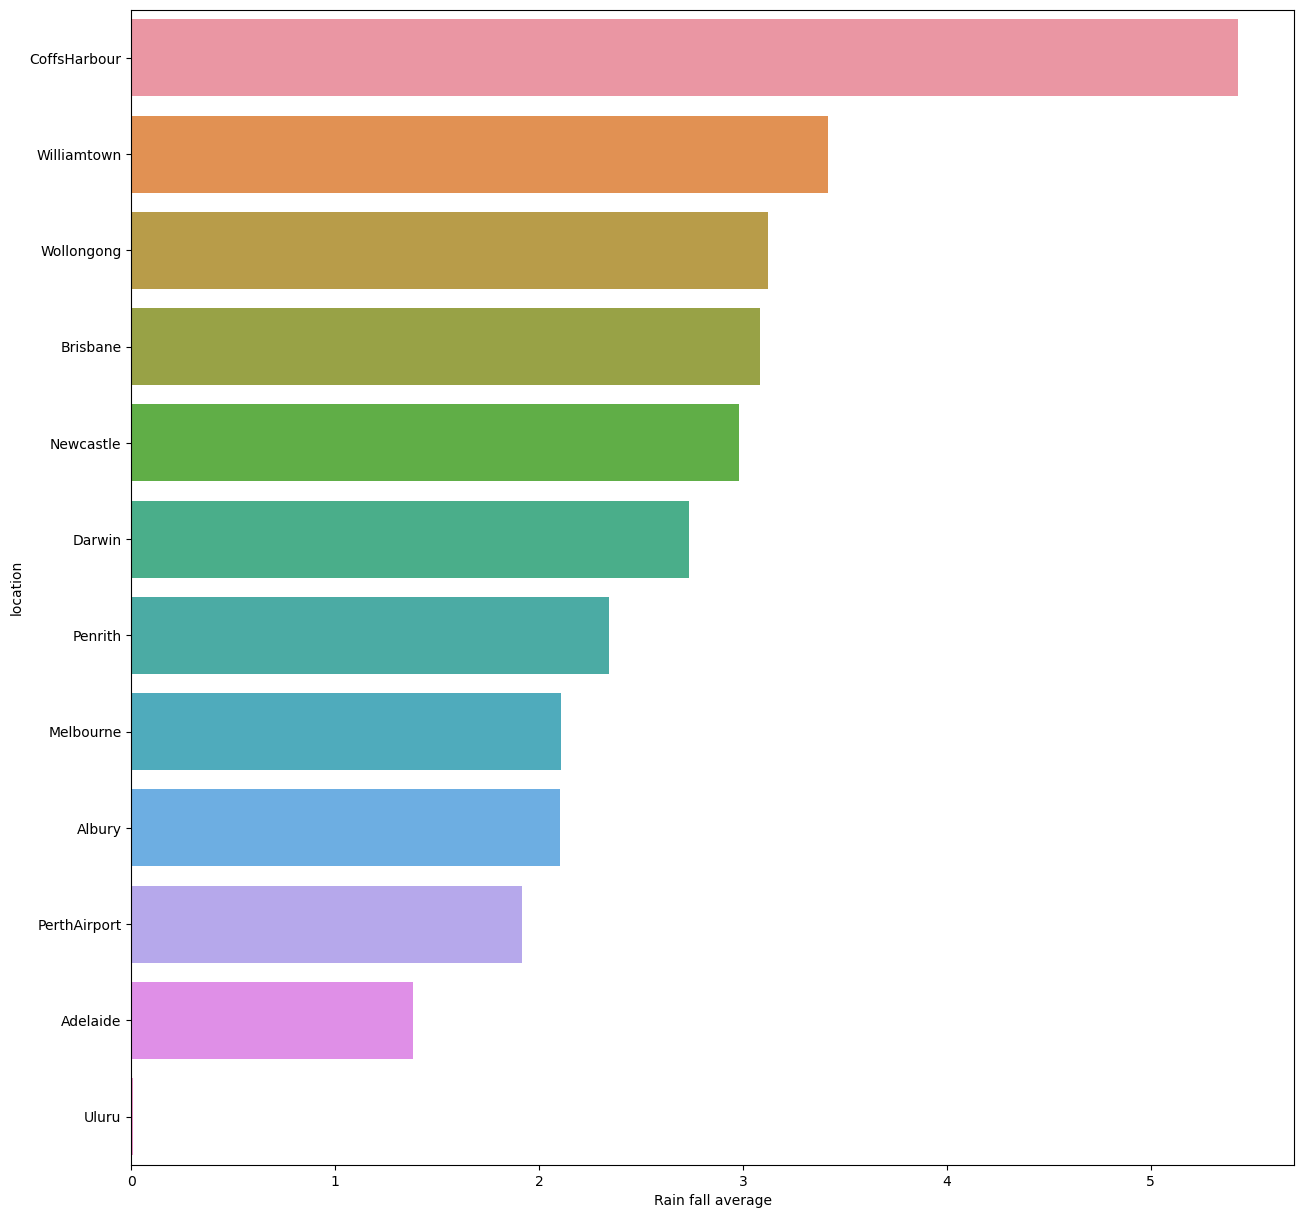

In [27]:
location = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x='Rainfall' , y='Location' , data=location)
plt.xlabel('Rain fall average')
plt.ylabel('location')
plt.show()

- coffsharbour has the highest average of rain fall
- Adelaide has the least average f rain fall
- Uluru is dry as no rain there

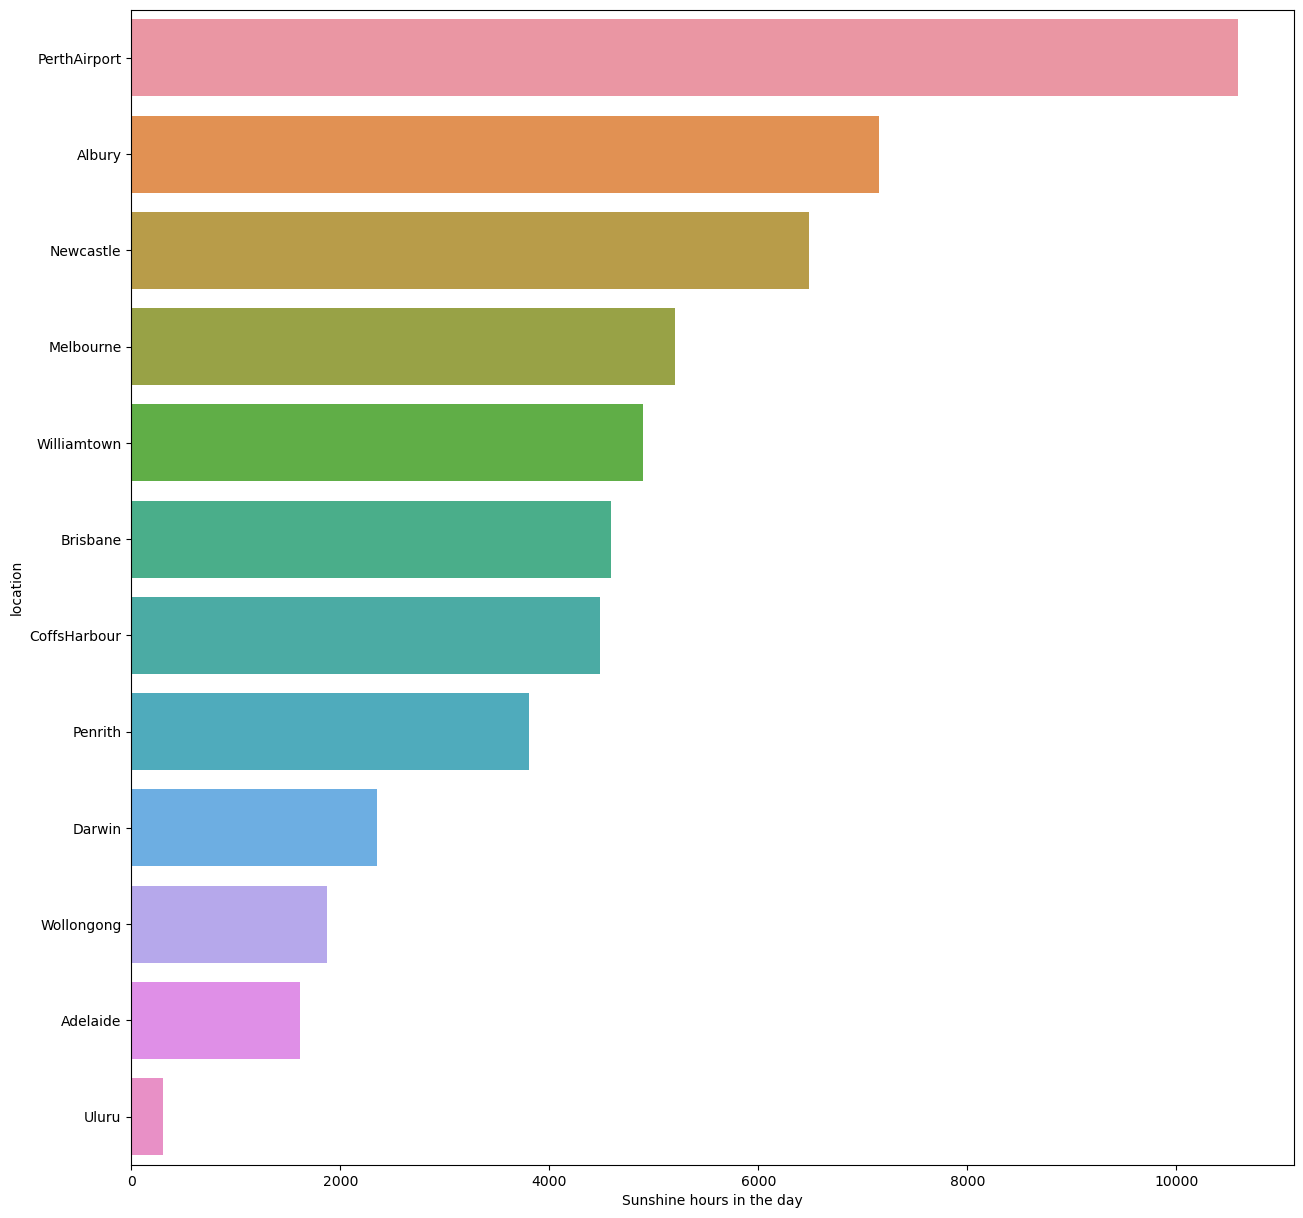

In [28]:
location = df.groupby('Location')['Sunshine'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x='Sunshine' , y='Location' , data=location)
plt.xlabel('Sunshine hours in the day')
plt.ylabel('location')
plt.show()

- PerthAirport has the most hours of sunshine per day which means less rain fall average
- Adelaide has the least hours of sunshine per day which mean more rain fall average
- Uluru has a mild weather

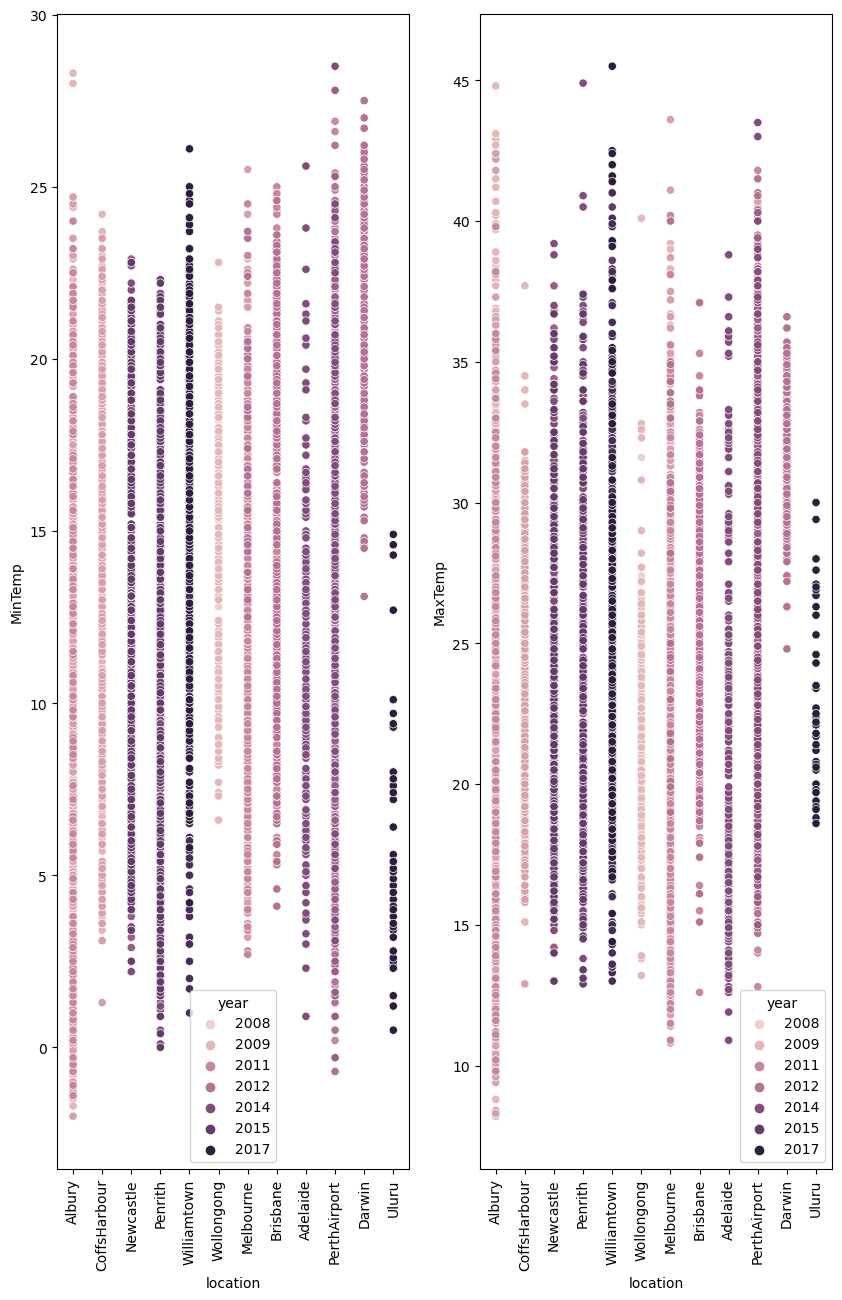

In [29]:
col = ['MinTemp', 'MaxTemp']
plt.figure(figsize=(10,15))
plot = 1
for i in col :
    if plot <= 2 :
        ax = plt.subplot(1,2,plot)
        sns.scatterplot(x=df['Location'] , y=df[i] , hue=df['year'])
        plt.xlabel('location')
        plt.xticks(rotation=90)
        plt.ylabel(i)
    plot += 1
plt.show()    

- Albury has the most minimum temperature record in 2009
- Williamtown has the highest maximum temperature record in 2017
- Uluru has the maximum temperature in range 17 - 30 celesius and the minimum temperature in range 0 to 10 celesius in year 2017 record which makes it the best region with mild weather

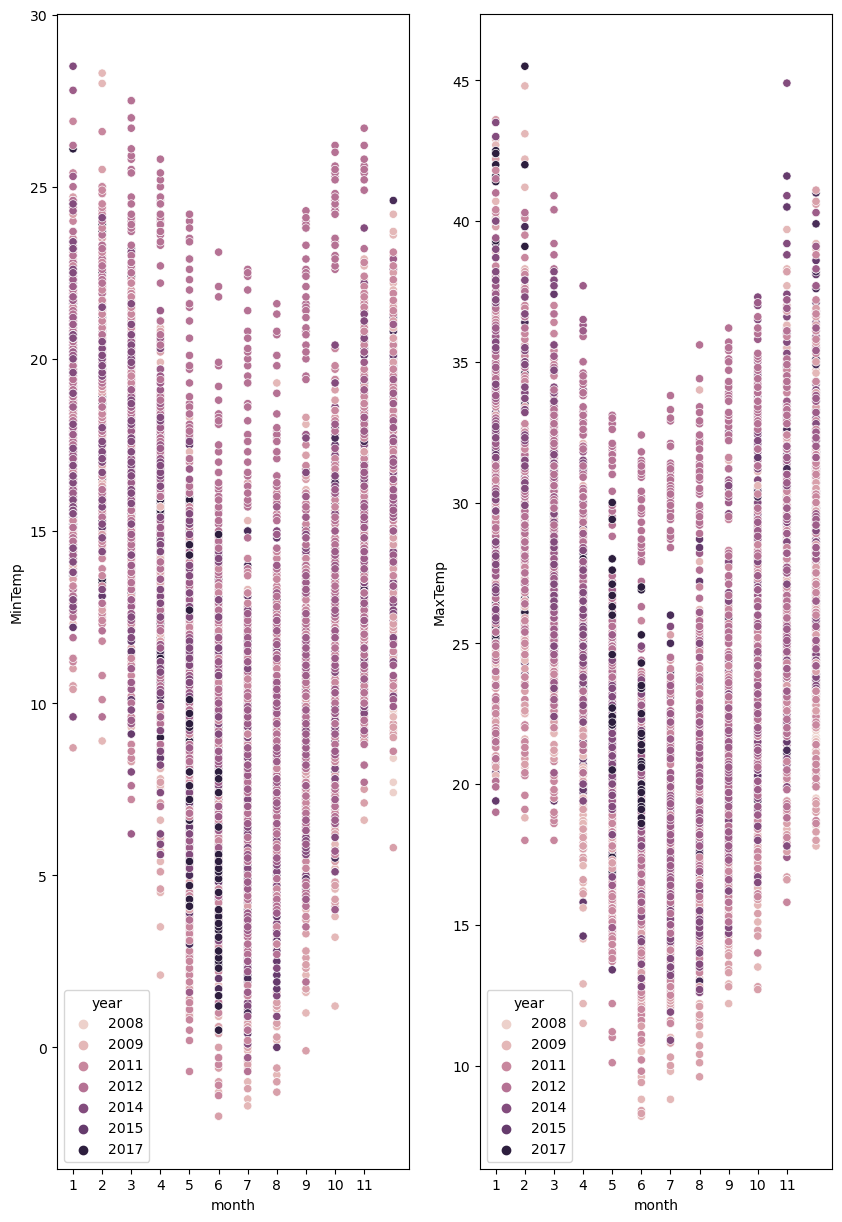

In [30]:
col = ['MinTemp', 'MaxTemp']
plt.figure(figsize=(10,15))
plot = 1
for i in col :
    if plot <= 2 :
        ax = plt.subplot(1,2,plot)
        sns.scatterplot(x=df['month'] , y=df[i] , hue=df['year'])
        plt.xticks(np.arange(1,12,1))
        plt.xlabel('month')
        plt.ylabel(i)
    plot += 1
plt.show()    

- month June recorded the most minimum temperature in 2009
- month february recorded the most maximum temperature in 2017

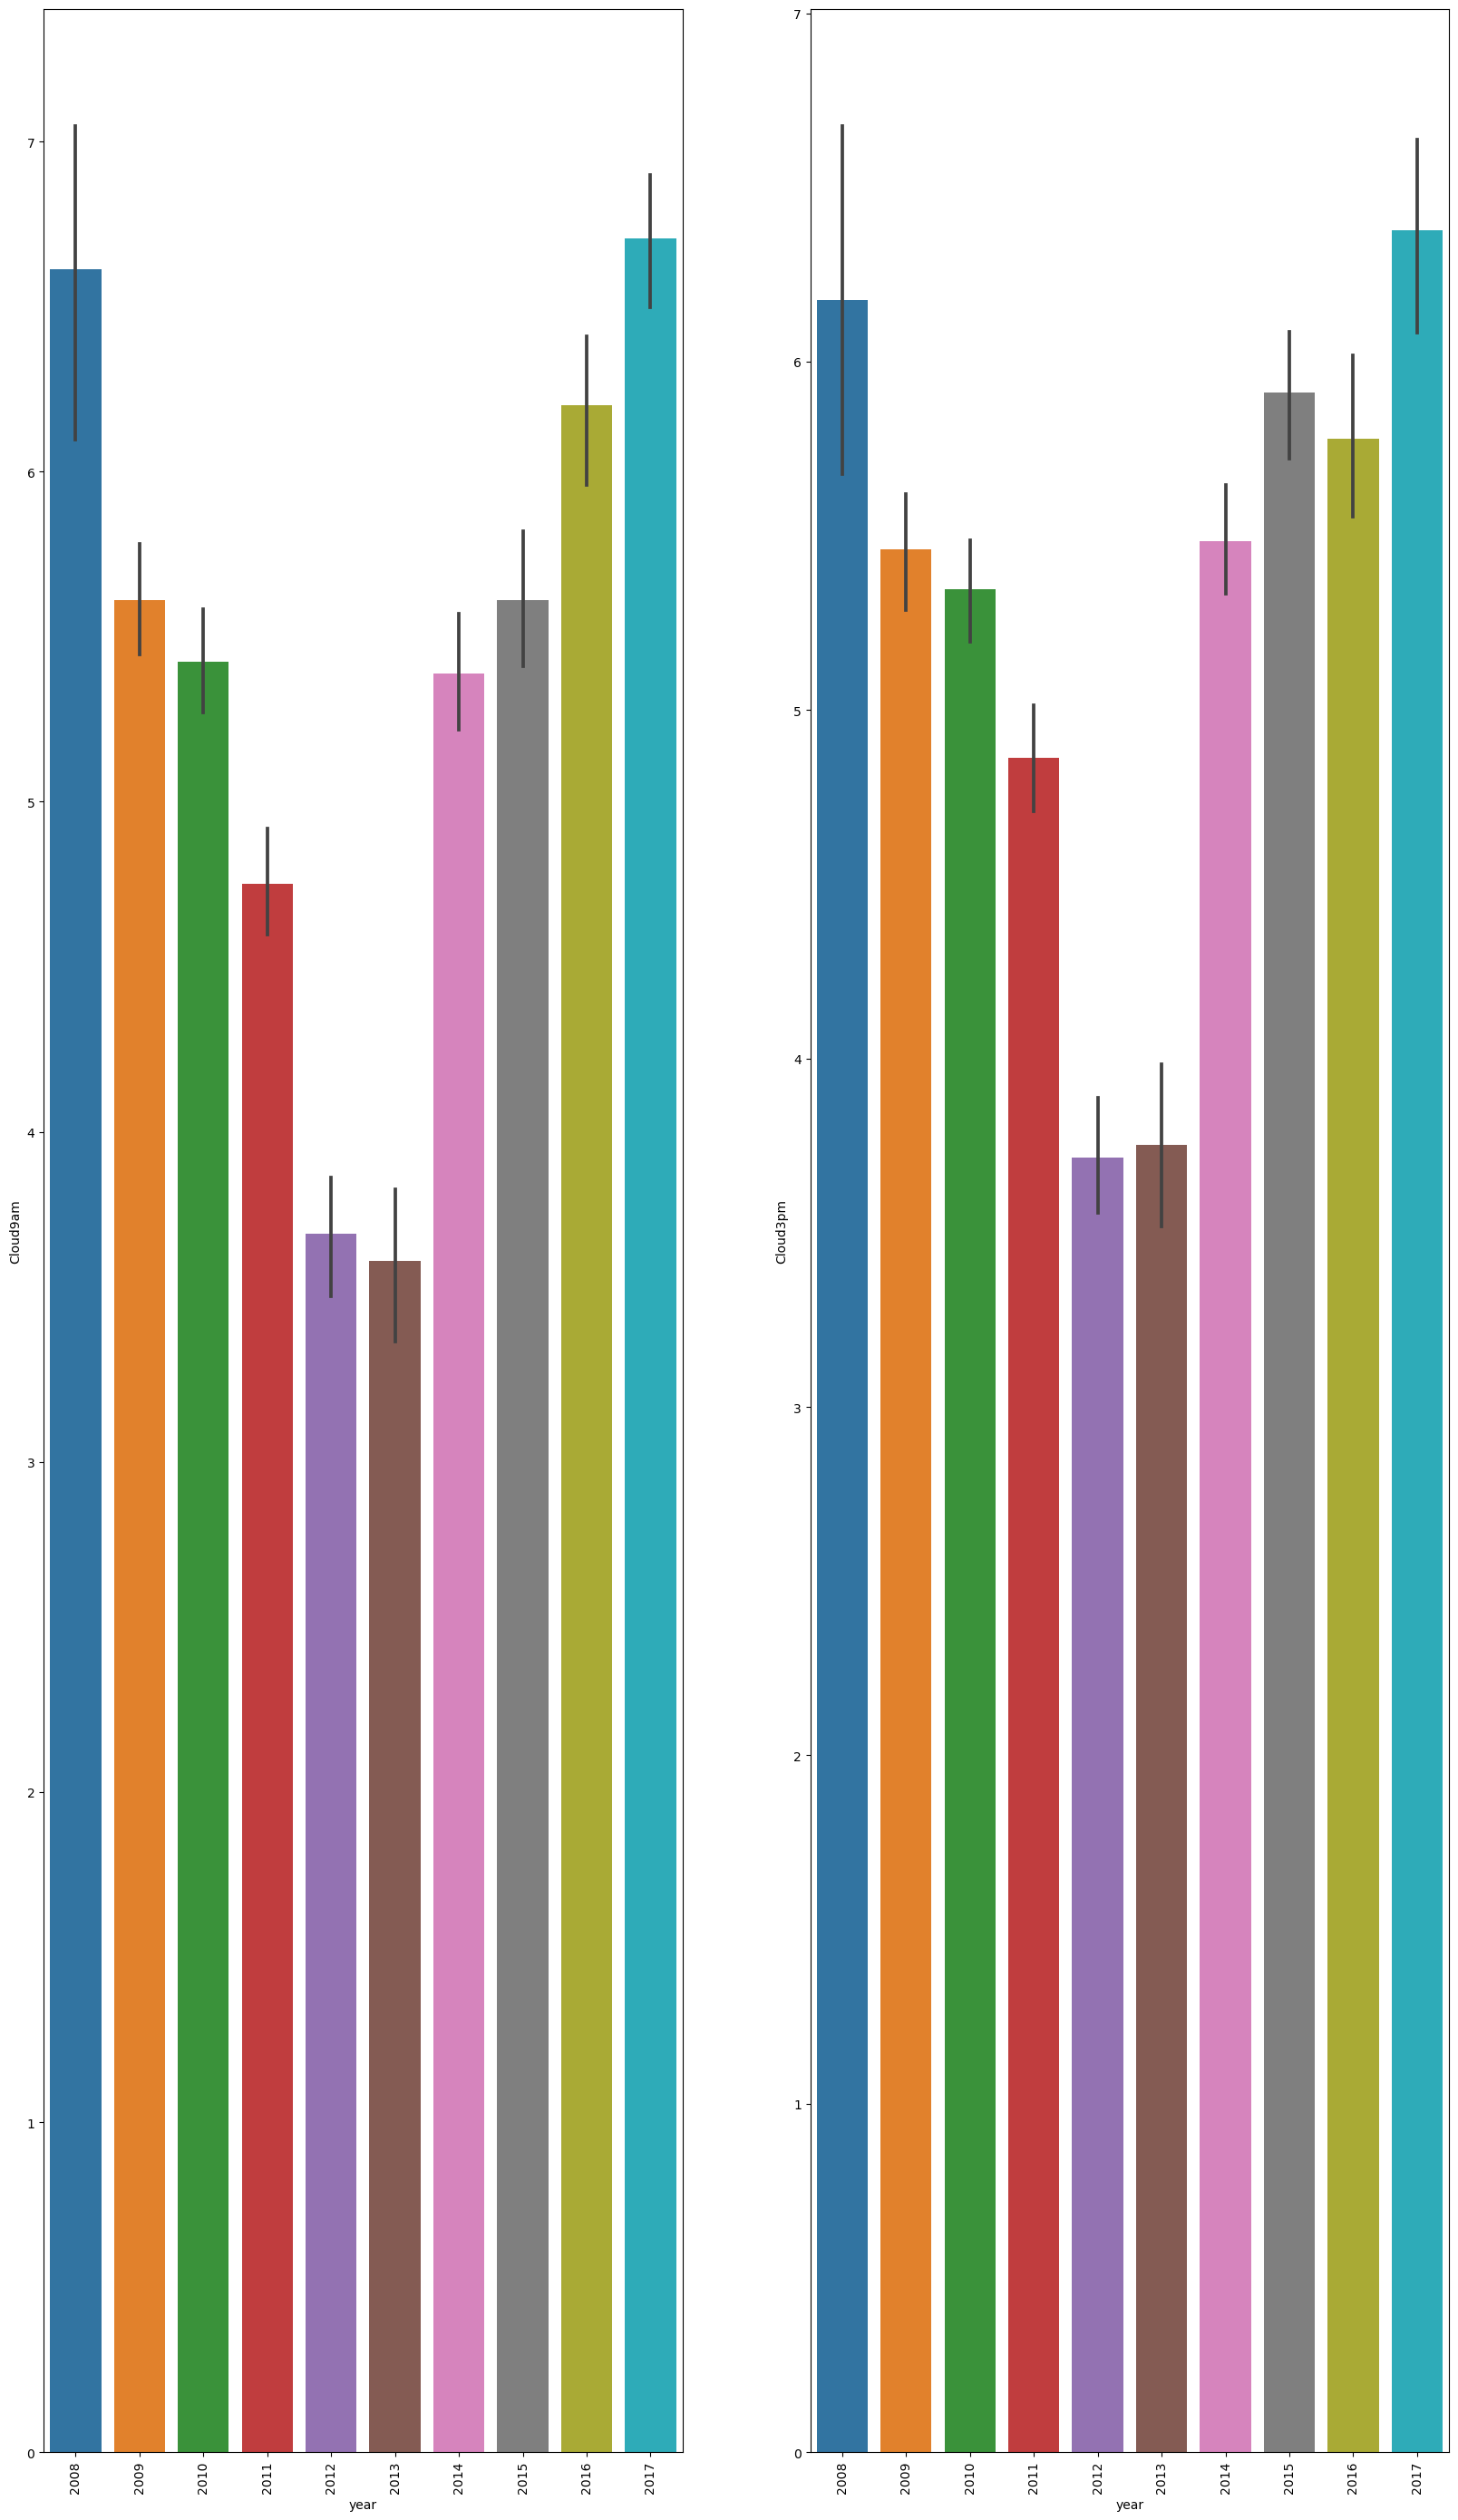

In [31]:
col = ['Cloud9am', 'Cloud3pm']
plt.figure(figsize=(20,35))
plot = 1
for i in col :
    if plot <= 2 :
        ax = plt.subplot(1,2,plot)
        sns.barplot(x=df['year'] , y=df[i])
        plt.xlabel('year')
        plt.xticks(rotation=90)
        plt.ylabel(i)
    plot += 1
plt.show()  

- 2017 has the highest record of cloudy sky at 9 am , 3pm
- 2013 has the lowest record of cloudy sky at 9 am
- 2012 has the lowest record of cloudy sky at 3 pm

In [32]:
len(categorical)

6

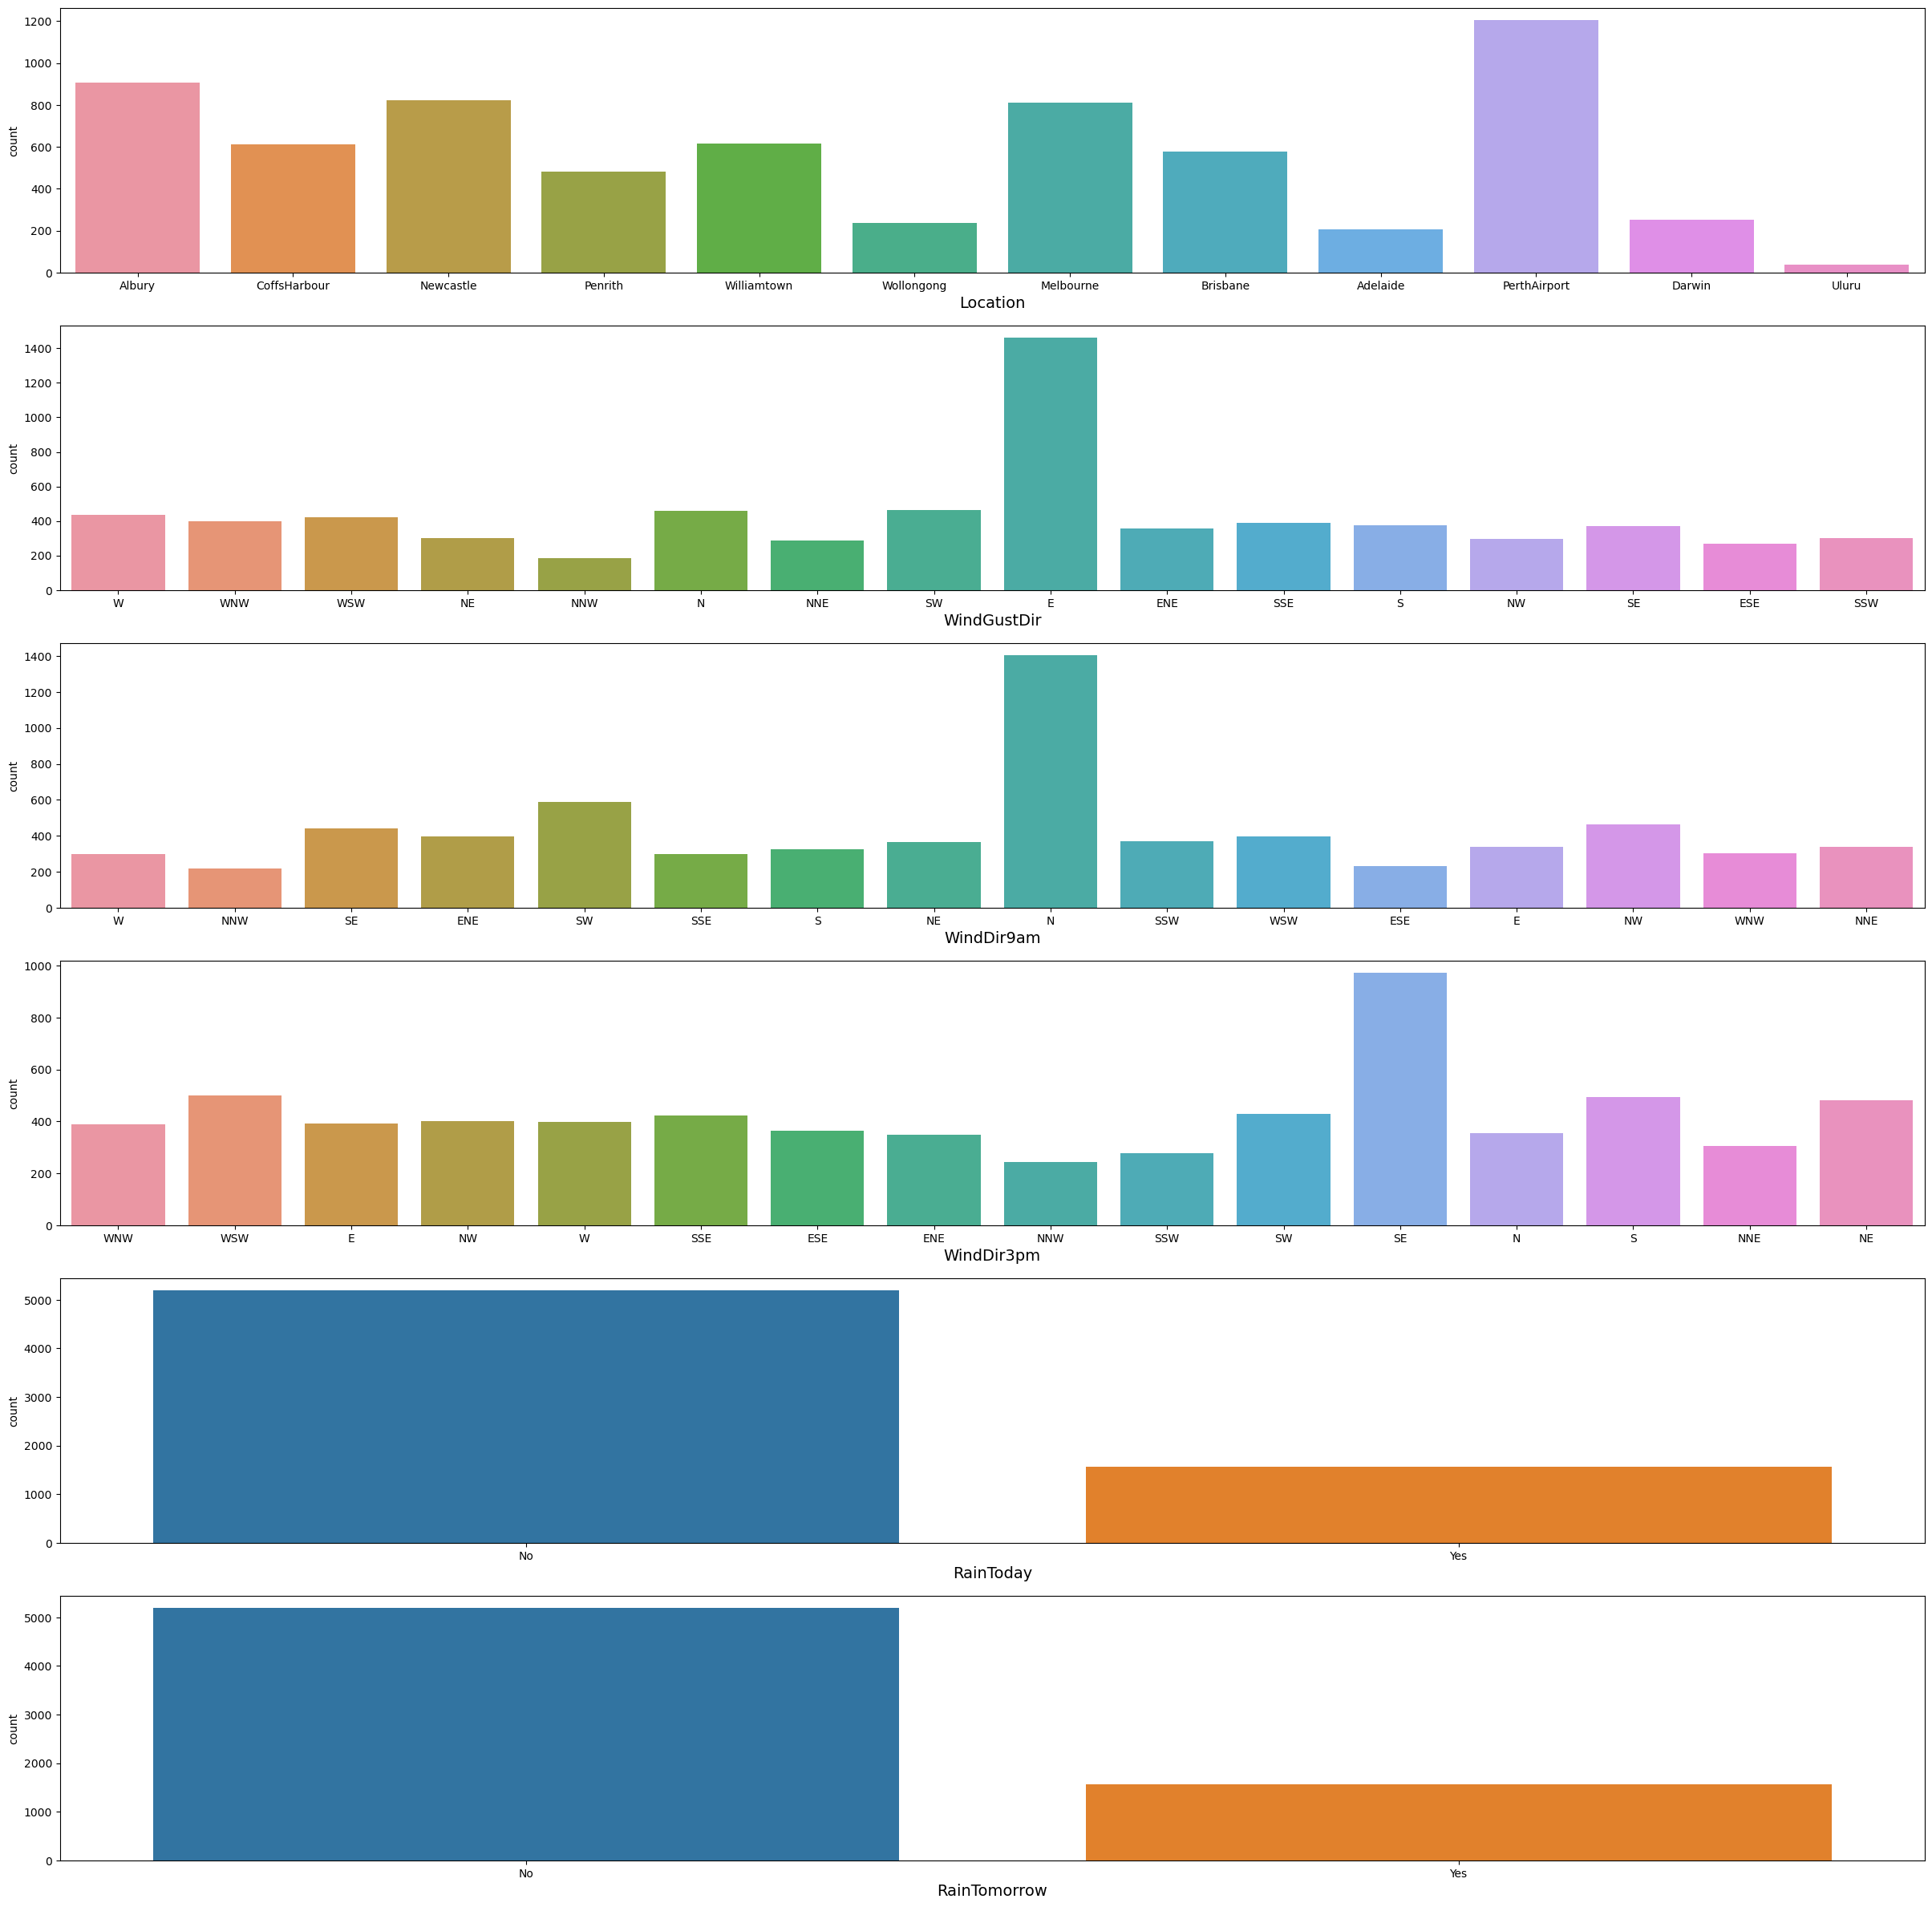

In [33]:
plt.figure(figsize=(30,30))
plot = 1
for i in categorical :
    if plot <= 6 :
        ax = plt.subplot(6,1,plot)
        sns.countplot(x = df[i])
        plt.xlabel(i,fontsize=14)
    plot += 1
plt.show()    

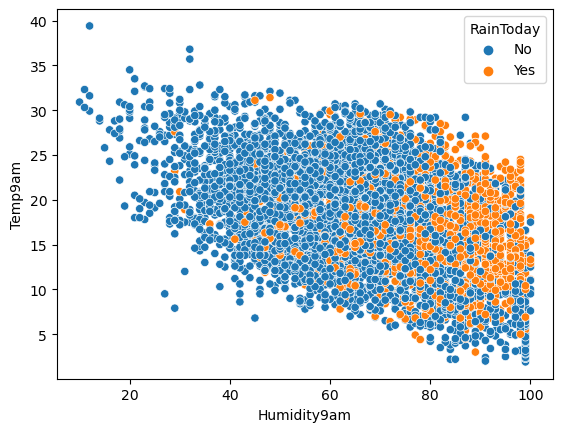

In [34]:
sns.scatterplot(x=df['Humidity9am'] , y=df['Temp9am'] , hue=df['RainToday'])
plt.show()

- when temperature record at 9 am decreses , Humadity increses which indicates it rains during the day

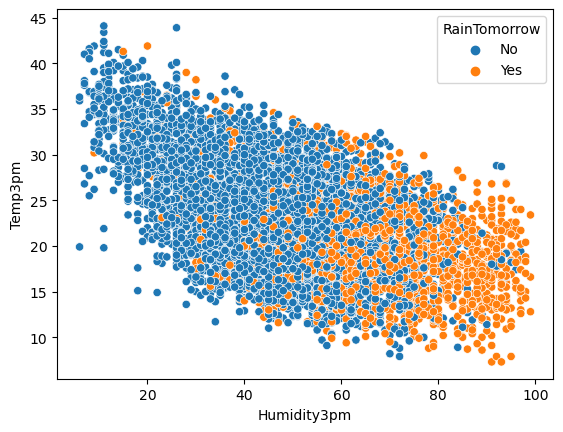

In [35]:
sns.scatterplot(x=df['Humidity3pm'] , y=df['Temp3pm'] , hue=df['RainTomorrow'])
plt.show()

- when temperature record at 3 pm decreses , Humadity increses which indicates it rains during tomorrow

# Statistical and analysing data

In [36]:
len(numerical)

19

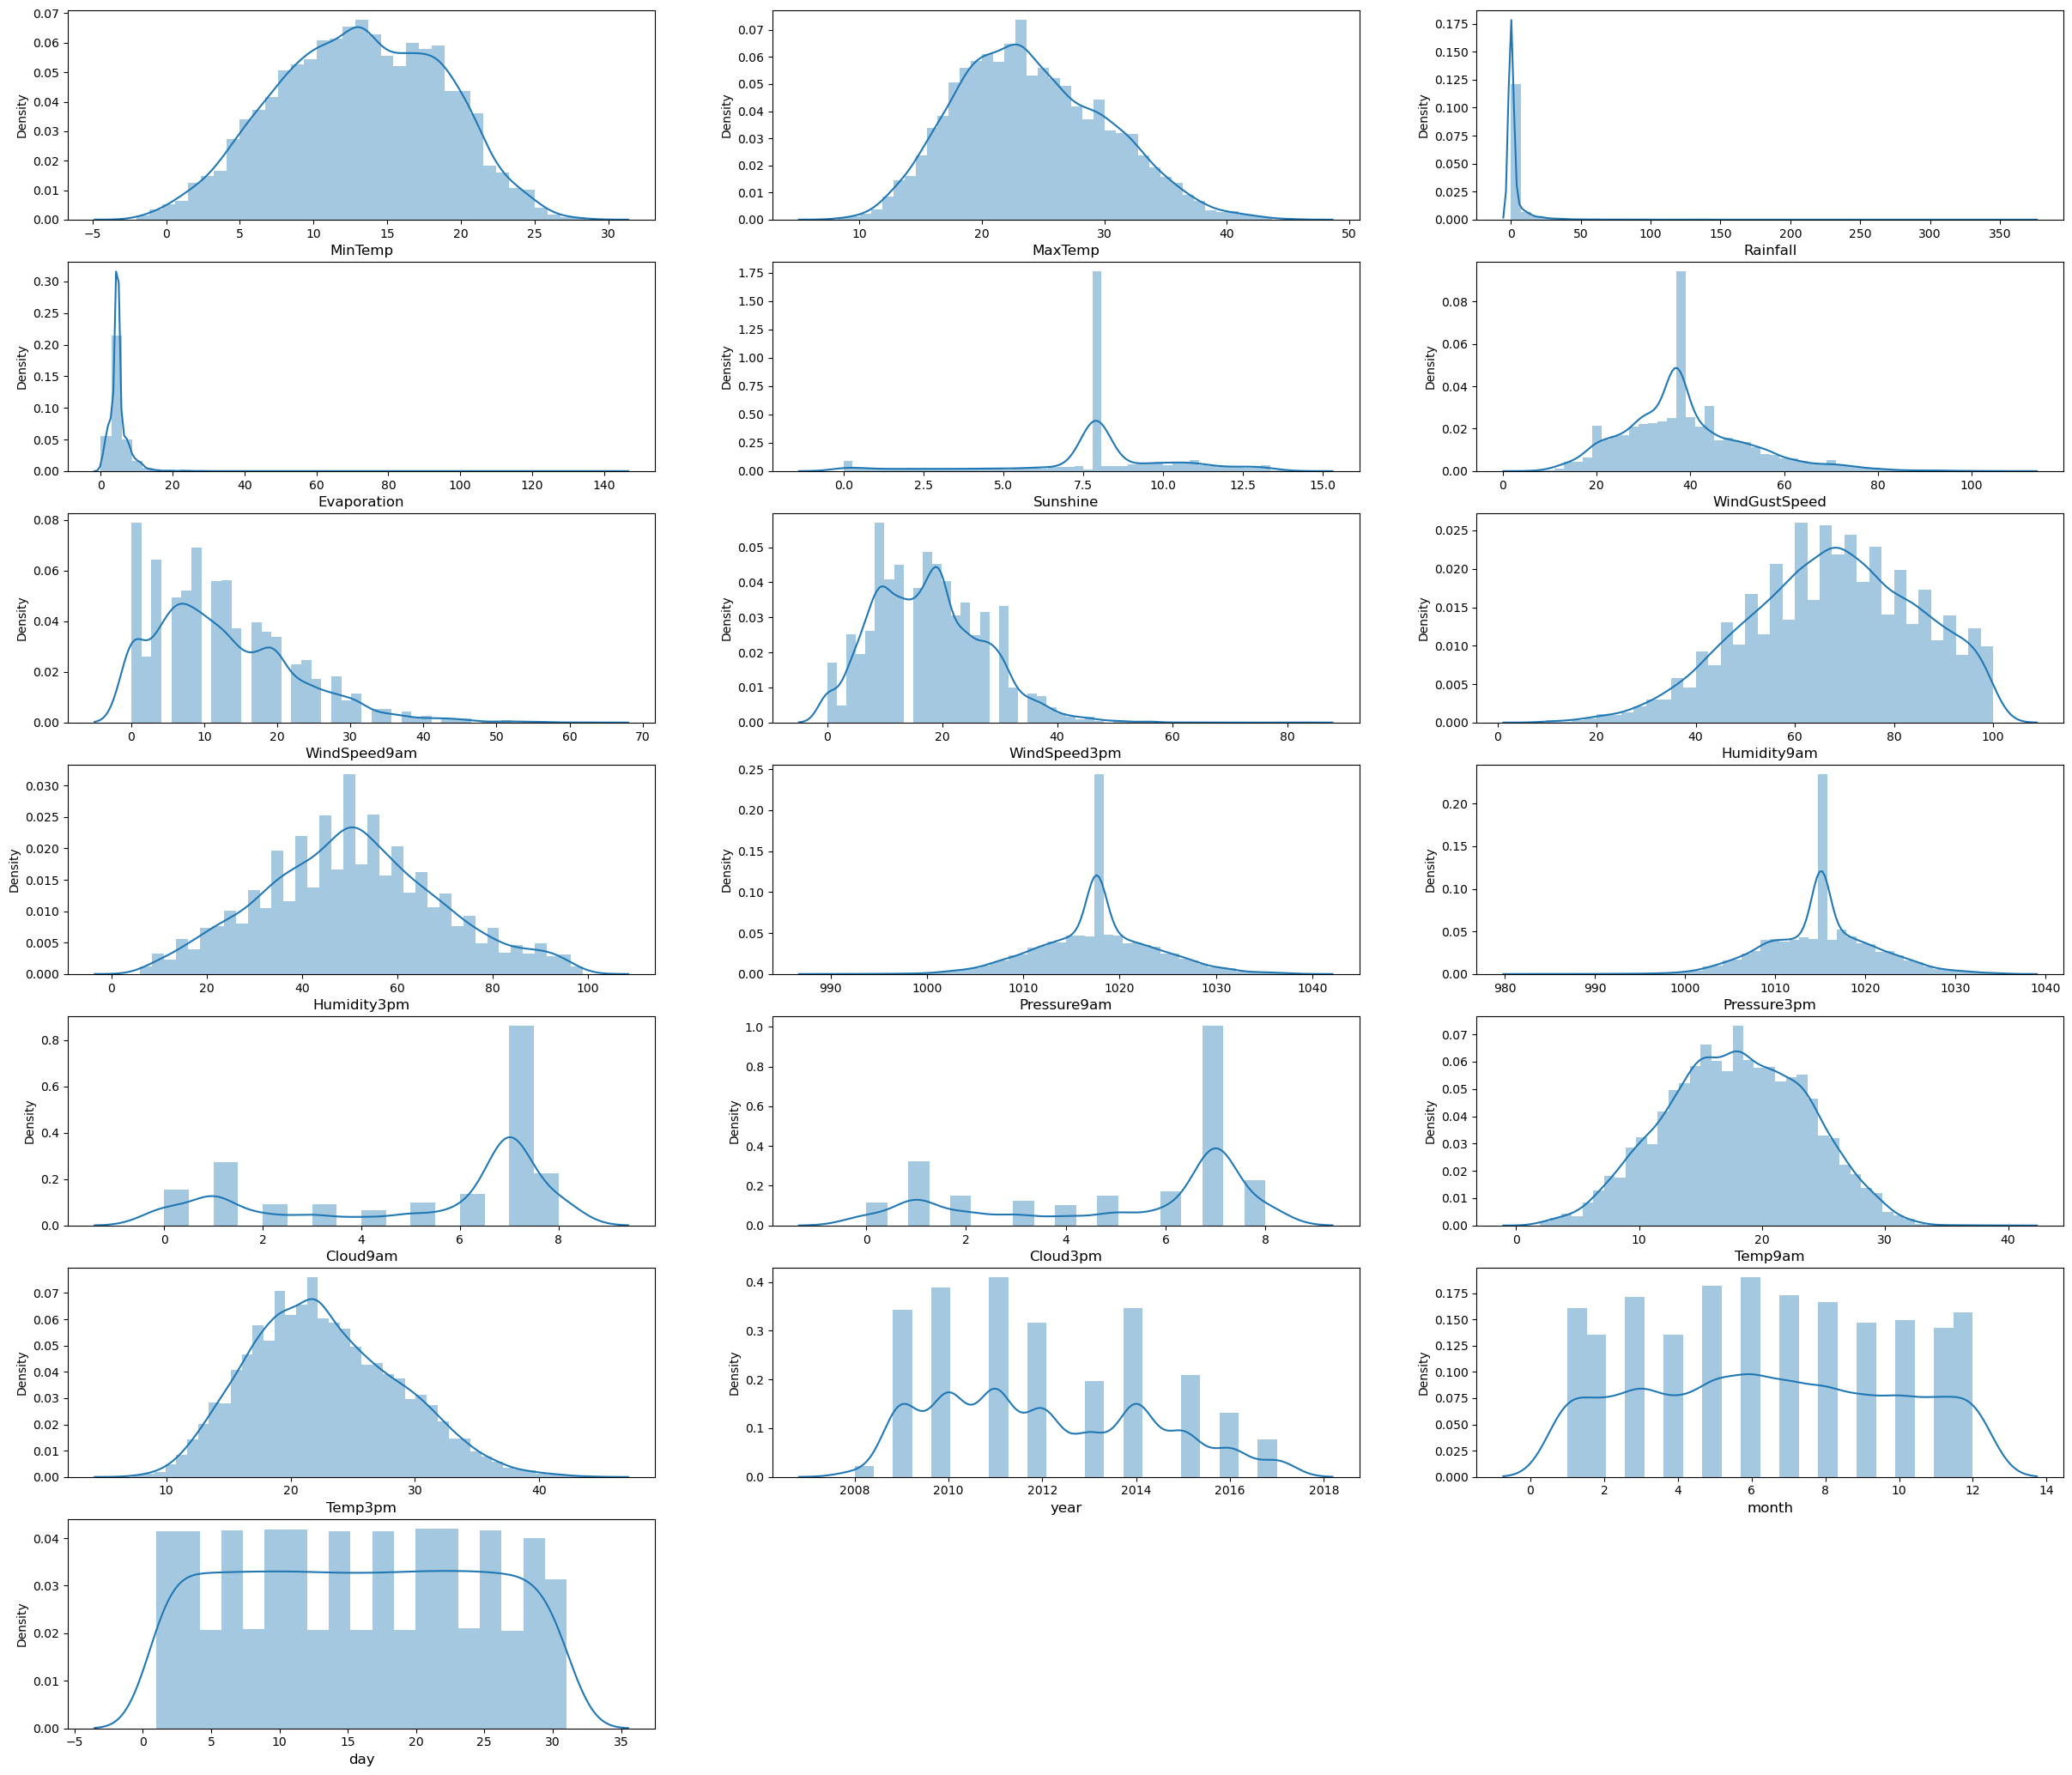

In [37]:
plt.figure(figsize=(30,26))
plot = 1
for i in numerical :
    if plot <= 19 :
        ax = plt.subplot(7,3,plot)
        sns.distplot(df[i])
        plt.xlabel(i , fontsize=12)
    plot += 1
plt.show()    

- columns 'Cloud9am', 'Cloud3pm' , 'year', 'month', 'day' are not skewed as they are discrete numerical data
- columns Rainfall ,Evaporation ,Sunshine are skewed so we need to remove it
- all other columns with cntinuous numerical data are not too much skewed so it is good to be performed but need to remove outliers first

In [38]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6762.000000  6762.000000  6762.000000   6762.00000  6762.000000   
mean     13.109145    24.093301     2.723410      4.99898     7.890896   
std       5.540667     6.130367    10.490138      3.36177     2.733639   
min      -2.000000     8.200000     0.000000      0.00000     0.000000   
25%       9.000000    19.600000     0.000000      4.00000     7.890896   
50%      13.109145    23.500000     0.000000      4.60000     7.890896   
75%      17.400000    28.400000     0.800000      5.00000     9.200000   
max      28.500000    45.500000   371.000000    145.00000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    6762.000000   6762.000000   6762.000000  6762.000000  6762.000000   
mean       38.702159     12.765602     17.562703    67.510500    50.467147   
std        13.393977      9.789075      9.548883    17.182756    18.498341   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    38.000000   
50%        37.000000     11.000000     17.000000    68.000000    50.000000   
75%        46.000000     19.000000     24.000000    80.000000    62.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean   1017.621222  1015.116060     5.071724     5.074534    17.895830   
std       6.027923     5.967643     2.746129     2.617013     5.722418   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.200000  1011.500000     2.000000     3.000000    13.900000   
50%    1017.600000  1015.100000     7.000000     7.000000    18.000000   
75%    1020.900000  1018.400000     7.000000     7.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm         year        month          day  
count  6762.000000  6762.000000  6762.000000  6762.000000  
mean     22.700281  2012.052203     6.462141    15.737208  
std       5.972262     2.301057     3.377471     8.793898  
min       7.300000  2008.000000     1.000000     1.000000  
25%      18.400000  2010.000000     4.000000     8.000000  
50%      22.100000  2012.000000     6.000000    16.000000  
75%      26.800000  2014.000000     9.000000    23.000000  
max      44.100000  2017.000000    12.000000    31.000000

- all columns are the same dataset shape
- most of columns are normally du=istributed as men is close to median 
- most of columns have outliers as 75% percentile is lower than maximum value

# checking for outliers

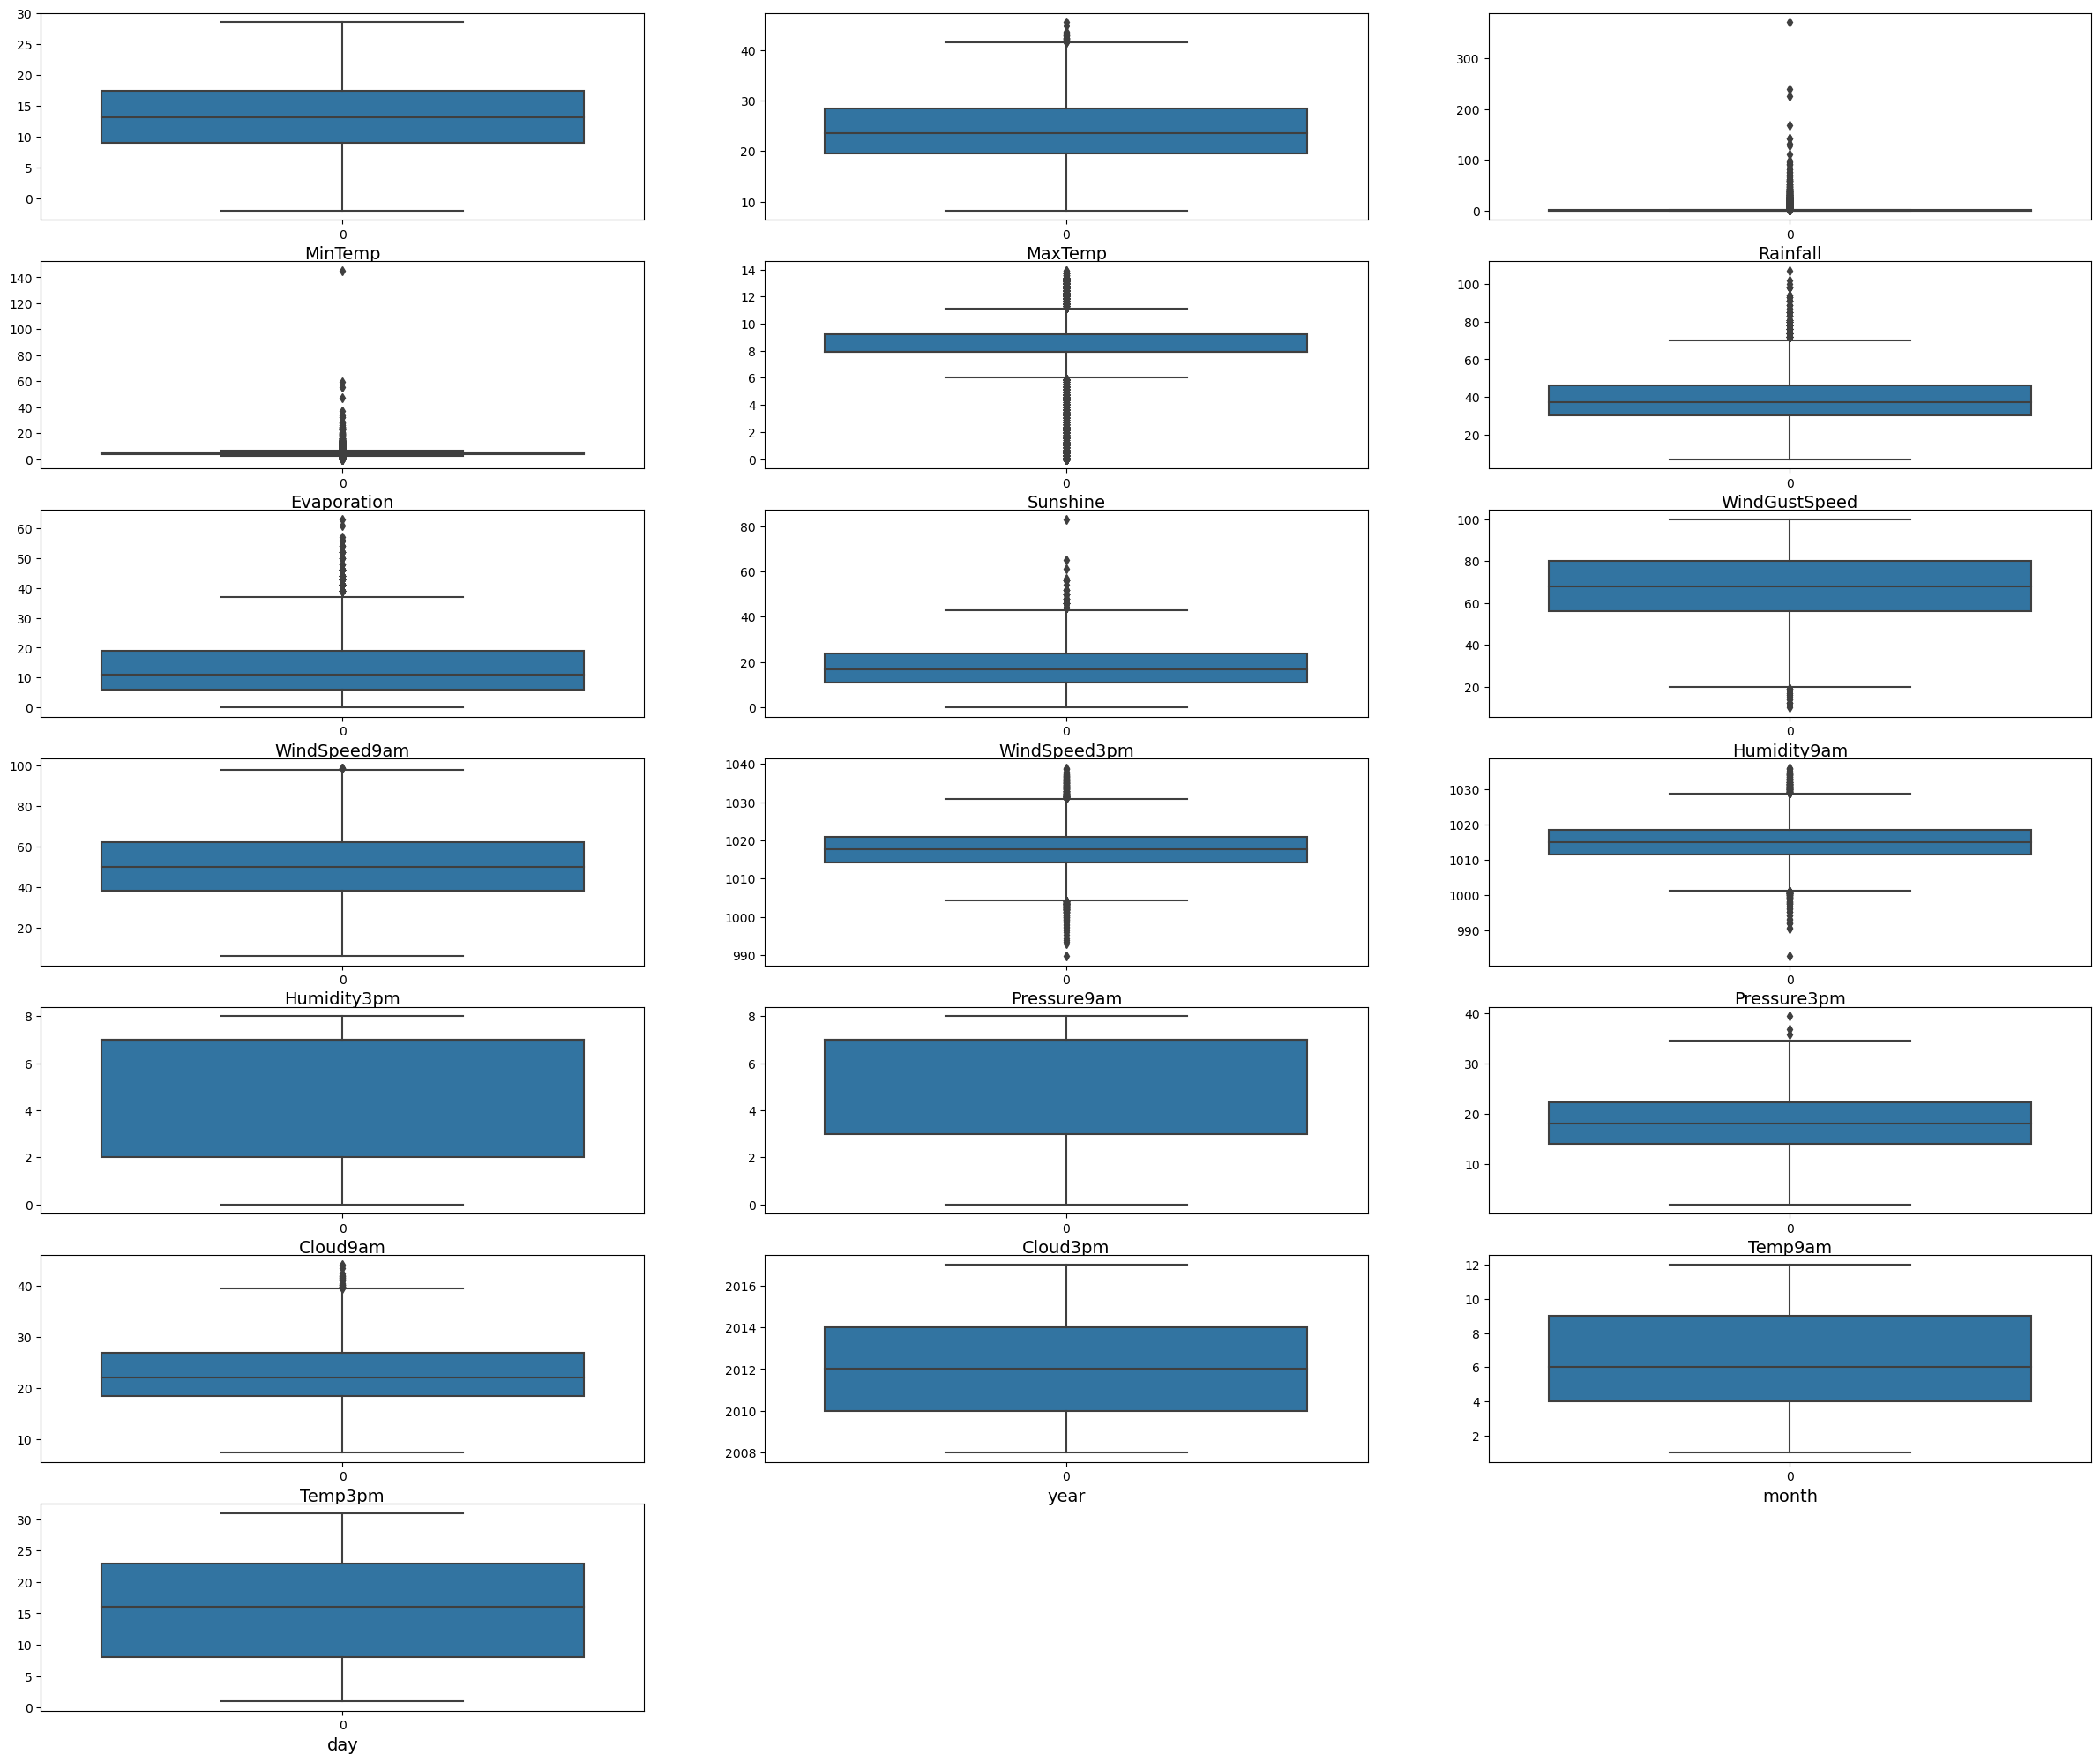

In [39]:
plt.figure(figsize=(30,25))
plot = 1
for i in numerical :
    if plot <= 19 :
        ax = plt.subplot(7,3,plot)
        sns.boxplot(df[i])
        plt.xlabel(i , fontsize=14)
    plot +=1
plt.show()    

some columns are having outliers so we have to delete them

In [40]:
# zscore method
from scipy.stats import zscore

In [41]:
outliers = df[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']]
z = np.abs(zscore(outliers))

In [42]:
df1 = df[(z<3).all(axis=1)]
df.shape

(6762, 25)

In [43]:
df1.shape

(6413, 25)

In [44]:
print('percentage of loss is ',((df.shape[0]-df1.shape[0])/df.shape[0])*100,' %')

percentage of loss is  5.161194912747708  %


In [45]:
#IQR
out = df[['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm']]

q1 = out.quantile(0.25)
q3 = out.quantile(0.75)
IQR = q3 - q1

df2 = df[~((df<(q1 - 1.5*IQR))|(df>(q3 + 1.5*IQR))).any(axis=1)]
df.shape

(6762, 25)

In [46]:
df2.shape

(3122, 25)

In [47]:
print('percentage of loss is ',((df.shape[0]-df2.shape[0])/df.shape[0])*100,' %')

percentage of loss is  53.83022774327122  %


In [48]:
# we prefer to use IQR as we can afford the percentage of loss in resampling data

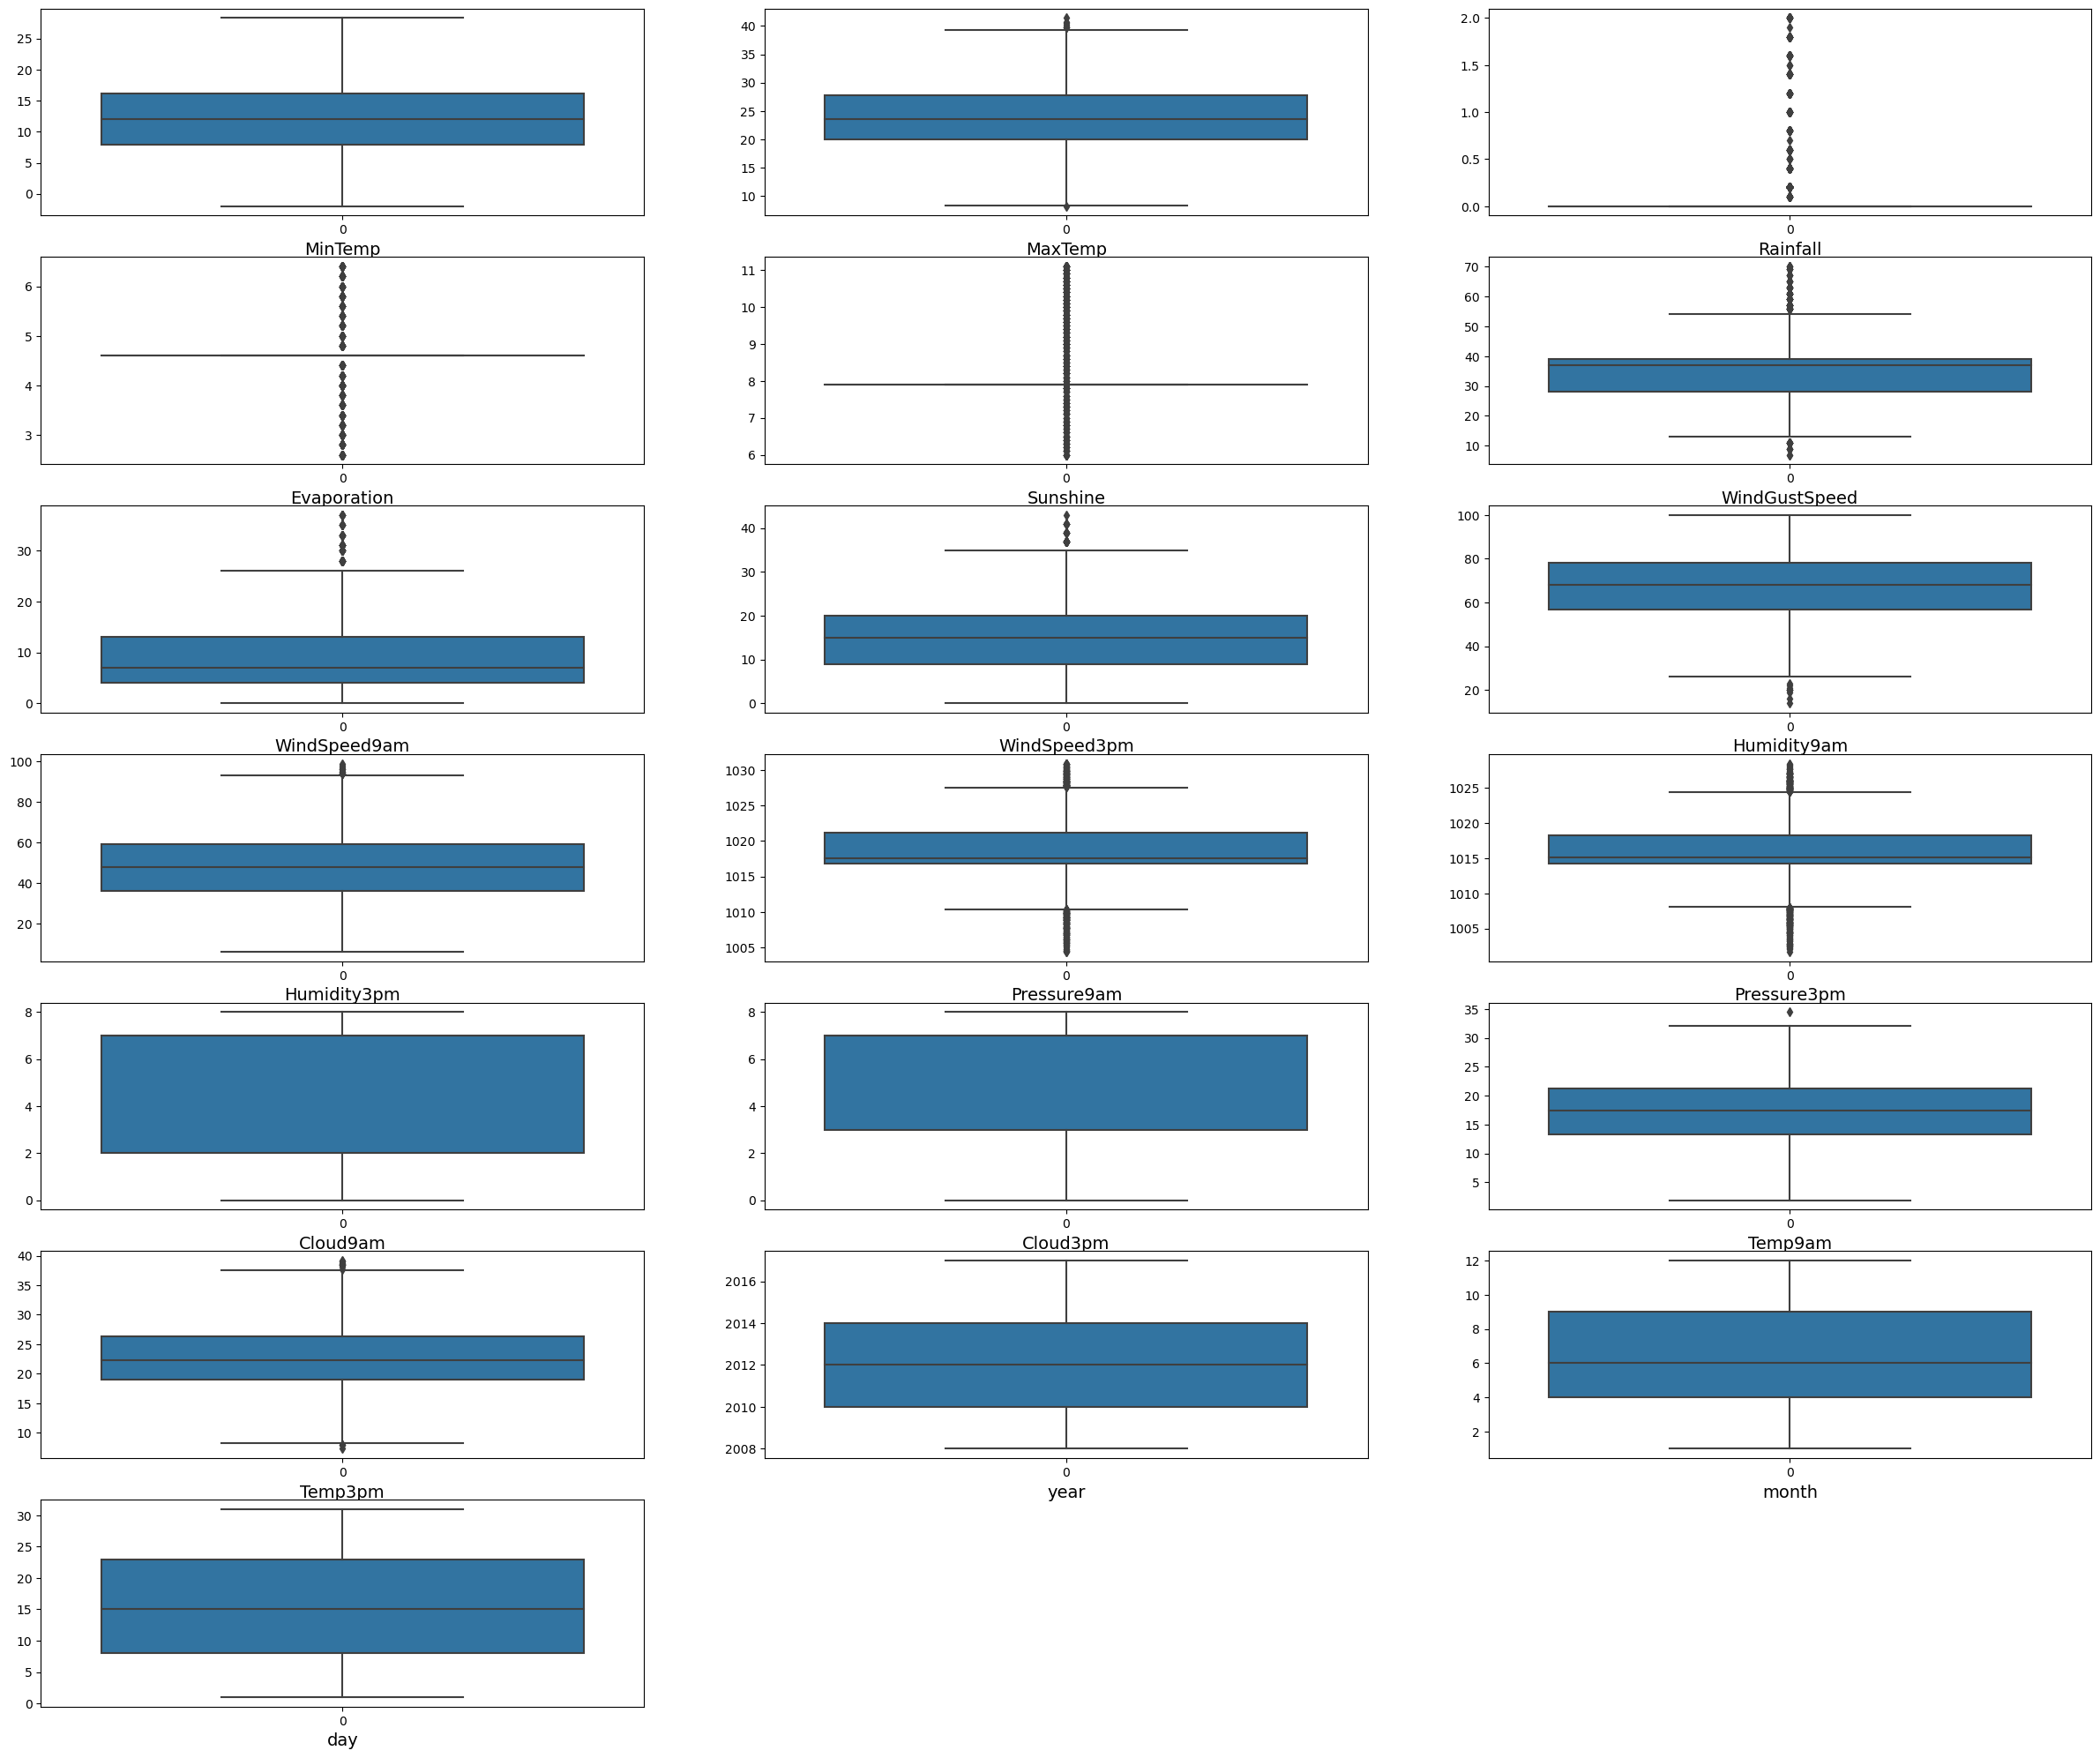

In [49]:
plt.figure(figsize=(30,25))
plot = 1
for i in numerical :
    if plot <= 19 :
        ax = plt.subplot(7,3,plot)
        sns.boxplot(df2[i])
        plt.xlabel(i , fontsize=14)
    plot +=1
plt.show()    

# skewness

In [50]:
df2.skew()

MinTemp         -0.007715
MaxTemp          0.197167
Rainfall         3.207852
Evaporation     -0.472781
Sunshine         1.531689
WindGustSpeed    0.246887
WindSpeed9am     0.901208
WindSpeed3pm     0.416221
Humidity9am     -0.127916
Humidity3pm      0.198514
Pressure9am      0.048548
Pressure3pm      0.019894
Cloud9am        -0.846348
Cloud3pm        -0.862901
Temp9am         -0.201324
Temp3pm          0.230773
year             0.068184
month            0.031809
day              0.035559
dtype: float64

- all columns looks good except Rainfall , Sunshine , WindSpeed9am we need to remove skewness
- Rainfall is a target variable so we will not remoove skewness
- columns Cloud9am , Cloud3pm are discrete data so no need to remove the skewness

In [51]:
df2['Sunshine'] = np.cbrt(df2['Sunshine'])
df2['WindSpeed9am'] = np.cbrt(df2['WindSpeed9am'])

In [52]:
df2.skew()

MinTemp         -0.007715
MaxTemp          0.197167
Rainfall         3.207852
Evaporation     -0.472781
Sunshine         1.346224
WindGustSpeed    0.246887
WindSpeed9am    -0.878390
WindSpeed3pm     0.416221
Humidity9am     -0.127916
Humidity3pm      0.198514
Pressure9am      0.048548
Pressure3pm      0.019894
Cloud9am        -0.846348
Cloud3pm        -0.862901
Temp9am         -0.201324
Temp3pm          0.230773
year             0.068184
month            0.031809
day              0.035559
dtype: float64

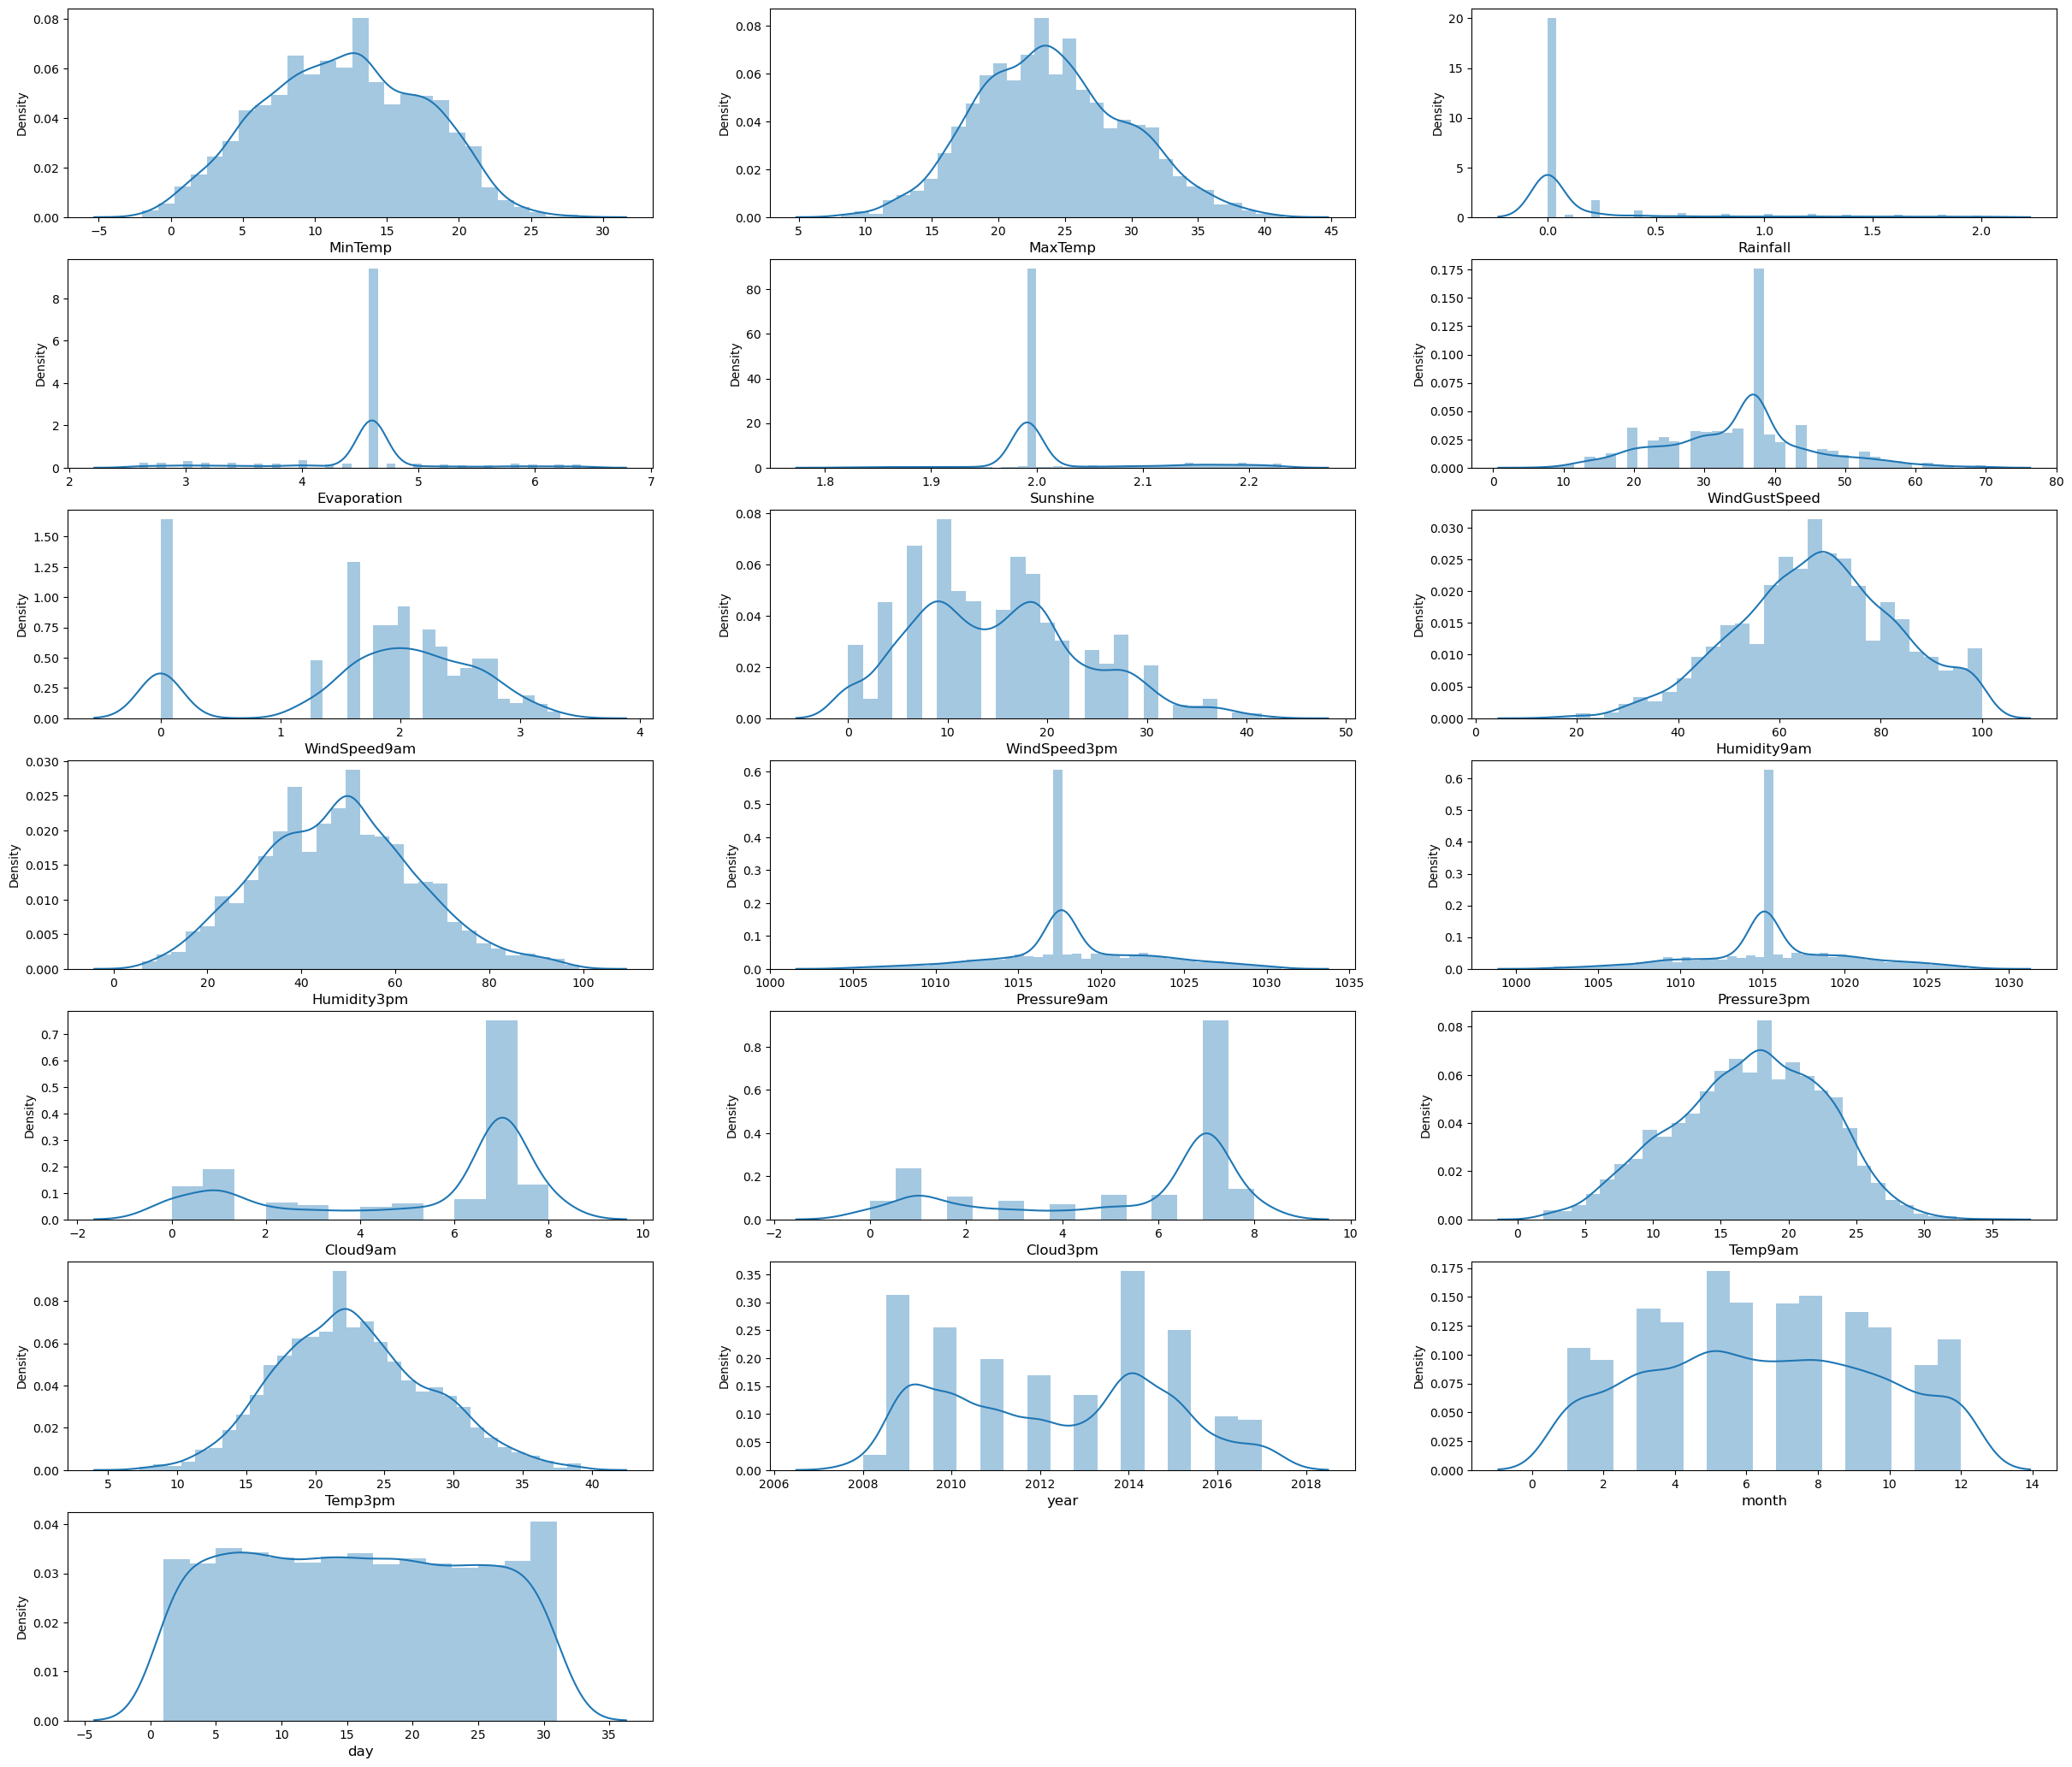

In [53]:
plt.figure(figsize=(30,26))
plot = 1
for i in numerical :
    if plot <= 19 :
        ax = plt.subplot(7,3,plot)
        sns.distplot(df2[i])
        plt.xlabel(i , fontsize=12)
    plot += 1
plt.show()    

- we reduced skewness as we could and there is not too much skew s we can move ahead

# Correlation

In [54]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [55]:
df2['RainToday'] = df2['RainToday'].replace({'No':0 ,'Yes':1})
df2['RainTomorrow'] = df2['RainTomorrow'].replace({'No':0 ,'Yes':1})

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [57]:
for i in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    df2[i] = le.fit_transform(df2[i])

In [58]:
df2.head(5)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                      
2008-12-01         1     13.4     22.9       0.6          4.6  1.990866   
2008-12-02         1      7.4     25.1       0.0          4.6  1.990866   
2008-12-03         1     12.9     25.7       0.0          4.6  1.990866   
2008-12-04         1      9.2     28.0       0.0          4.6  1.990866   
2008-12-05         1     17.5     32.3       1.0          4.6  1.990866   

            WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Date                                                            ...   
2008-12-01           13           44.0          13          14  ...   
2008-12-02           14           44.0           6          15  ...   
2008-12-03           15           46.0          13          15  ...   
2008-12-04            4           24.0           9           0  ...   
2008-12-05           13           41.0           1           7  ...   

            Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
Date                                                                       
2008-12-01       1007.1       8.0       7.0     16.9     21.8          0   
2008-12-02       1007.8       7.0       7.0     17.2     24.3          0   
2008-12-03       1008.7       7.0       2.0     21.0     23.2          0   
2008-12-04       1012.8       7.0       7.0     18.1     26.5          0   
2008-12-05       1006.0       7.0       8.0     17.8     29.7          0   

            RainTomorrow  year  month  day  
Date                                        
2008-12-01             0  2008     12    1  
2008-12-02             0  2008     12    2  
2008-12-03             0  2008     12    3  
2008-12-04             0  2008     12    4  
2008-12-05             0  2008     12    5  

[5 rows x 25 columns]

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3122 entries, 2008-12-01 to 2017-06-25
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       3122 non-null   int32  
 1   MinTemp        3122 non-null   float64
 2   MaxTemp        3122 non-null   float64
 3   Rainfall       3122 non-null   float64
 4   Evaporation    3122 non-null   float64
 5   Sunshine       3122 non-null   float64
 6   WindGustDir    3122 non-null   int32  
 7   WindGustSpeed  3122 non-null   float64
 8   WindDir9am     3122 non-null   int32  
 9   WindDir3pm     3122 non-null   int32  
 10  WindSpeed9am   3122 non-null   float64
 11  WindSpeed3pm   3122 non-null   float64
 12  Humidity9am    3122 non-null   float64
 13  Humidity3pm    3122 non-null   float64
 14  Pressure9am    3122 non-null   float64
 15  Pressure3pm    3122 non-null   float64
 16  Cloud9am       3122 non-null   float64
 17  Cloud3pm       3122 non-null   flo

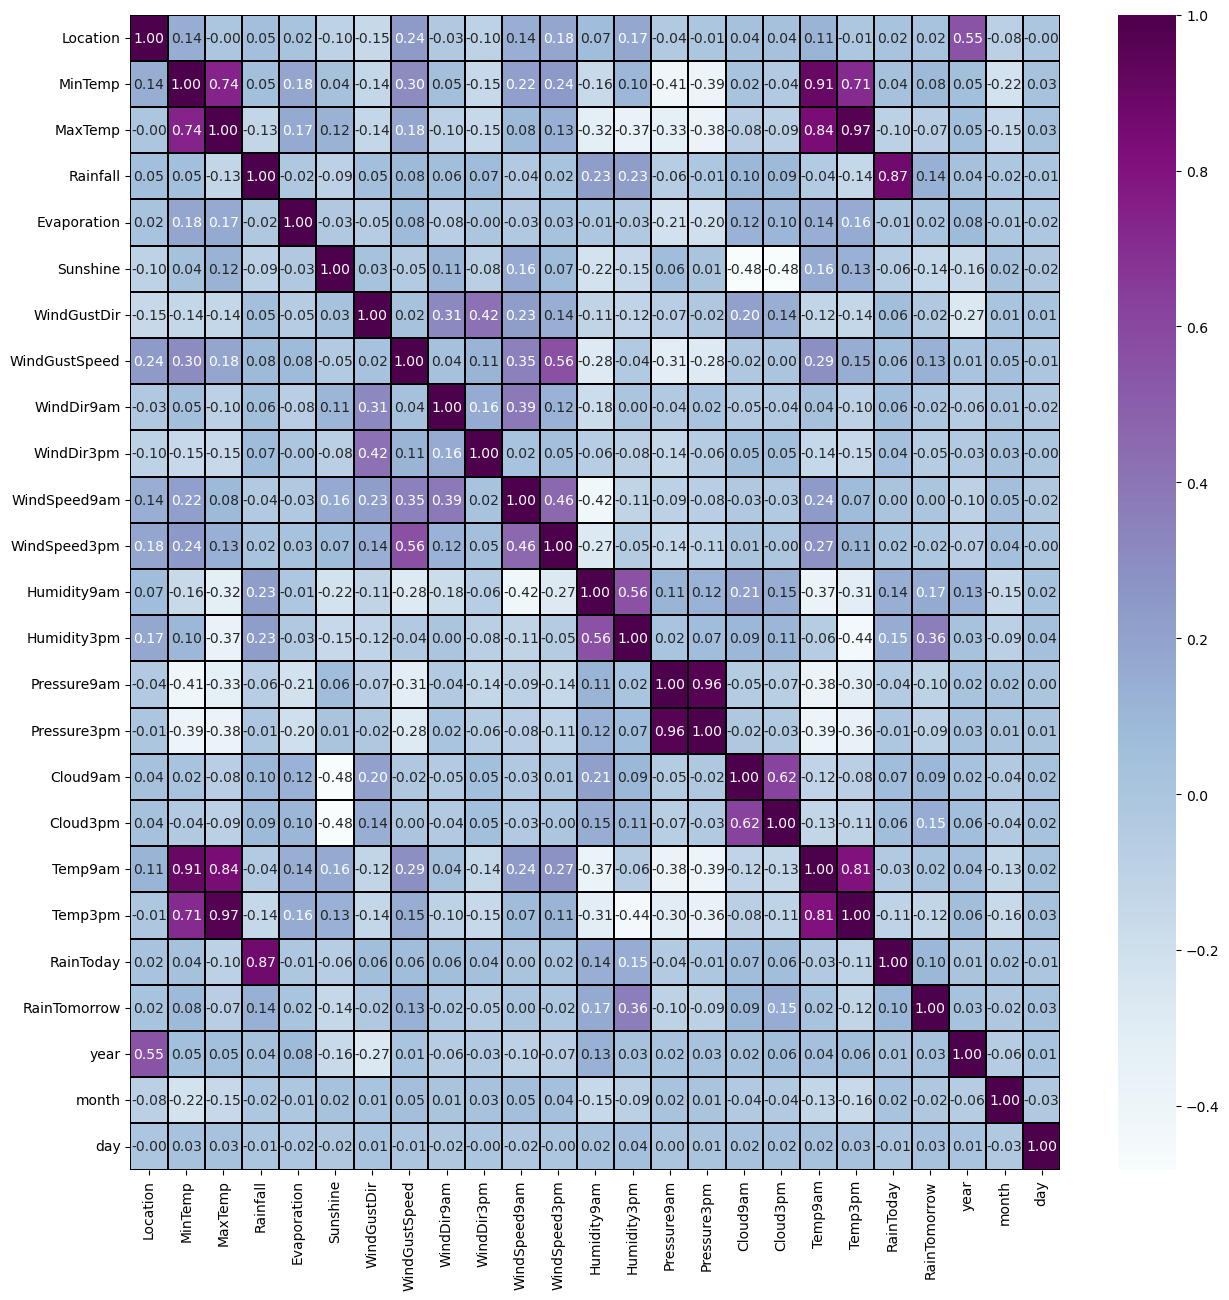

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), annot=True , linewidth=0.1 , cmap='BuPu', fmt='.2f' , linecolor='black')
plt.show()

- target variable RainTomorrow is positively correlated with Humadity3pm
- target variable Rainfall is highly positively correlated with feature RainToday
- Location and Year are highly positively correlated
- features MinTemp , Temp3pm and MaxTemp are highly positively correlated
- features WindGustSpeed and WindSpeed3pm are highly ppositively correlated
- feature WindGustDir and WindDir3pm are positively correlated
- features Temp9am and Temp3pm are highly positively correlated
- Cloud9am and Cloud3pm are highly positively correlated and highly negatively correlated with Sunshine
- features MinTemp and MaxTemp are highly negatively correlated with features Pressure9am , Pressure3pm
- Location is highly positively correlated with year

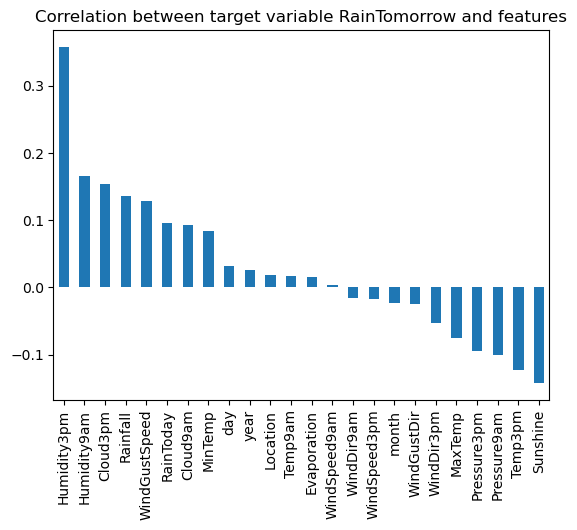

In [61]:
df2.corr()['RainTomorrow'].sort_values(ascending=False).drop('RainTomorrow').plot(kind='bar')
plt.title('Correlation between target variable RainTomorrow and features')
plt.show()

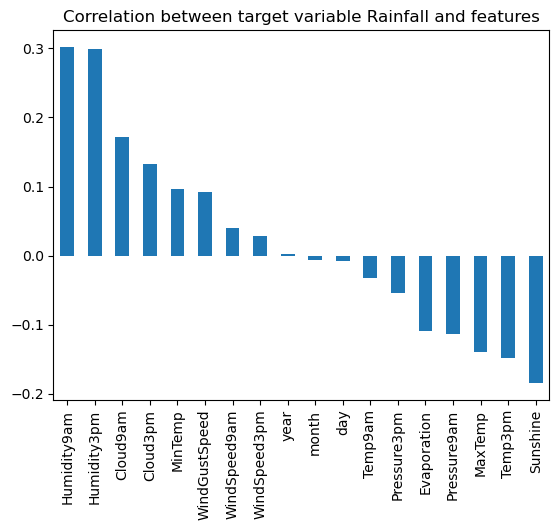

In [64]:
df1.corr()['Rainfall'].sort_values(ascending=False).drop('Rainfall').plot(kind='bar')
plt.title('Correlation between target variable Rainfall and features')
plt.show()

# Model predicting RainTomorrow

In [65]:
x= df2.drop('RainTomorrow',axis=1)
y= df2['RainTomorrow']

print('shape of features: ',x.shape)
print('shape of label: ',y.shape)

shape of features:  (3122, 24)
shape of label:  (3122,)


# scaling data

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
x_scaler = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaler , columns = x.columns)
x_scaled

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0    -1.236229  0.260808 -0.199247  1.219392     0.136063 -0.374436   
1    -1.236229 -0.826838  0.192326 -0.368377     0.136063 -0.374436   
2    -1.236229  0.170171  0.299118 -0.368377     0.136063 -0.374436   
3    -1.236229 -0.500544  0.708489 -0.368377     0.136063 -0.374436   
4    -1.236229  1.004032  1.473835  2.277904     0.136063 -0.374436   
...        ...       ...       ...       ...          ...       ...   
3117  1.183714 -1.660699 -0.110253 -0.368377     0.136063 -0.374436   
3118  1.183714 -1.515680  0.227923 -0.368377     0.136063 -0.374436   
3119  1.183714 -1.189386  0.512703 -0.368377     0.136063 -0.374436   
3120  1.183714 -0.754328  0.530502 -0.368377     0.136063 -0.374436   
3121  1.183714  0.532719 -0.092454 -0.368377     0.136063 -0.374436   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
0        1.280329       0.873868    1.422816    1.454149  ...    -2.278905   
1        1.467305       0.873868   -0.199124    1.687034  ...    -1.661431   
2        1.654282       1.065382    1.422816    1.687034  ...    -2.300197   
3       -0.402461      -1.041274    0.495993   -1.806236  ...    -0.170979   
4        1.280329       0.586597   -1.357653   -0.176044  ...    -1.618847   
...           ...            ...         ...         ...  ...          ...   
3117    -1.150367      -0.370974    0.495993   -1.573352  ...     1.319474   
3118    -0.028508      -1.232788    0.495993   -1.107582  ...     1.085260   
3119    -0.589437       0.203568    0.495993    1.454149  ...     0.552956   
3120     0.532422      -0.658246    0.727699   -1.107582  ...     0.212281   
3121    -1.150367       0.203568   -1.125948   -1.340467  ...     0.382618   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
0       -1.858449  1.035994  0.688026 -0.034210 -0.174545  -0.232417   
1       -1.707287  0.670239  0.688026  0.020449  0.282657  -0.232417   
2       -1.512935  0.670239 -1.267561  0.712797  0.081488  -0.232417   
3       -0.627557  0.670239  0.688026  0.184426  0.684995  -0.232417   
4       -2.095989  0.670239  1.079143  0.129767  1.270214  -0.232417   
...           ...       ...       ...       ...       ...        ...   
3117     0.992037  0.670239  0.688026 -1.273149 -0.064817  -0.232417   
3118     0.732902  0.670239  0.688026 -1.127391  0.319233  -0.232417   
3119     0.236226  0.670239  0.688026 -0.835876  0.611843  -0.232417   
3120     0.171442 -0.792782 -1.267561 -0.362164  0.593555  -0.232417   
3121     0.473767  1.035994  1.079143 -0.380384 -0.339138  -0.232417   

          year     month       day  
0    -1.740927  1.714685 -1.661024  
1    -1.740927  1.714685 -1.547367  
2    -1.740927  1.714685 -1.433710  
3    -1.740927  1.714685 -1.320053  
4    -1.740927  1.714685 -1.206396  
...        ...       ...       ...  
3117  1.858261 -0.145696  0.612117  
3118  1.858261 -0.145696  0.725774  
3119  1.858261 -0.145696  0.839431  
3120  1.858261 -0.145696  0.953088  
3121  1.858261 -0.145696  1.066745  

[3122 rows x 24 columns]

# Check variance inflation factor

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['column'] = x_scaled.columns
vif

vif         column
0    1.756319       Location
1    9.244184        MinTemp
2   21.082603        MaxTemp
3    4.449143       Rainfall
4    1.115749    Evaporation
5    1.637853       Sunshine
6    1.660532    WindGustDir
7    1.842805  WindGustSpeed
8    1.381294     WindDir9am
9    1.416463     WindDir3pm
10   1.835988   WindSpeed9am
11   1.751982   WindSpeed3pm
12   3.423307    Humidity9am
13   4.683709    Humidity3pm
14  17.581594    Pressure9am
15  16.765823    Pressure3pm
16   1.972845       Cloud9am
17   1.805011       Cloud3pm
18  17.544448        Temp9am
19  25.330130        Temp3pm
20   4.162961      RainToday
21   1.711097           year
22   1.157013          month
23   1.010398            day

There is multicollinearity problem so we need to drop columns to solve problem

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA()
pca.fit_transform(x_scaled)

array([[ 1.26725921,  0.7635792 ,  3.9355151 , ..., -0.31066062,
         0.13269604,  0.1178908 ],
       [ 1.22105681, -0.45663261,  2.92211302, ..., -0.21455128,
        -0.05898811, -0.07451849],
       [ 2.4797181 , -1.07070576,  4.04341936, ..., -0.20386347,
         0.45518938,  0.02195014],
       ...,
       [-0.20700283, -0.06600369, -0.01539395, ...,  0.26908373,
        -0.12871479, -0.05695754],
       [ 0.43842807, -1.35618462, -0.74220187, ...,  0.16777328,
         0.11252261, -0.02949019],
       [ 0.07251997,  0.97264281, -1.16341879, ...,  0.34322738,
         0.14409225,  0.20916309]])

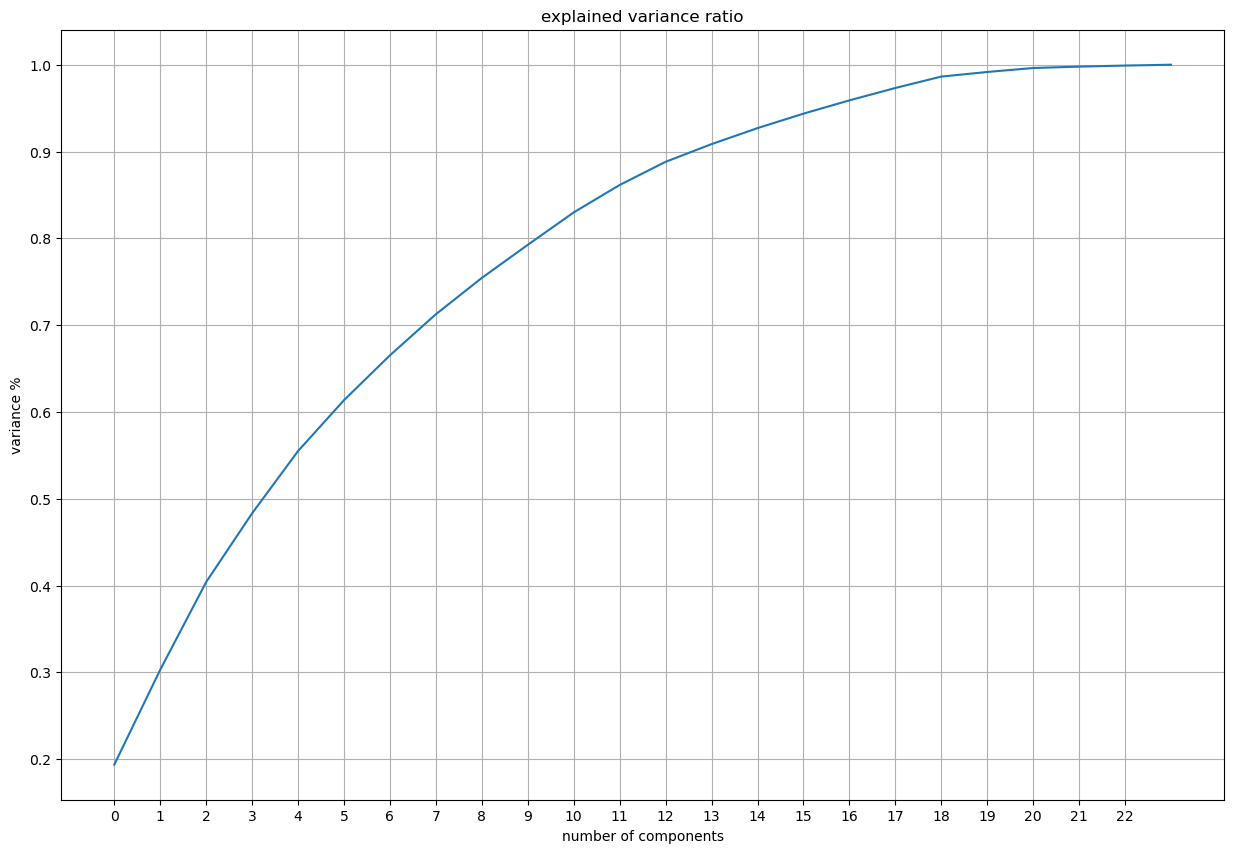

In [72]:
#now let us see on the screen t get the best components
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('variance %')
plt.title('explained variance ratio')
plt.grid(axis='both')
plt.xticks(np.arange(0,23,1))
plt.show()

at number of components 16 we get variance 95 % so we will choose it

In [73]:
pca = PCA(n_components=16)
new_com  = pca.fit_transform(x_scaled)
compo = pd.DataFrame(new_com , columns=np.arange(16))
compo

0         1         2         3         4         5         6   \
0     1.267259  0.763579  3.935515 -2.041145  1.500401 -1.045863  0.625474   
1     1.221057 -0.456633  2.922113 -3.052667  1.070275 -1.276107  1.577872   
2     2.479718 -1.070706  4.043419 -1.852245  1.070483 -1.361392  0.453519   
3     0.852120 -1.477558  0.042502 -2.078342  0.815834  0.841242  1.533941   
4     2.187299  1.724578  1.172176 -1.799518  2.396928 -0.205224  1.260197   
...        ...       ...       ...       ...       ...       ...       ...   
3117 -1.344931 -0.649289 -0.973346  0.171795 -2.597339  0.981152  1.767108   
3118 -1.133789 -0.601736 -0.840554 -0.467487 -2.006034  1.235407  1.505554   
3119 -0.207003 -0.066004 -0.015394 -0.772252 -1.838451  0.322421  1.760040   
3120  0.438428 -1.356185 -0.742202  0.492573 -1.102509  0.101733  1.014480   
3121  0.072520  0.972643 -1.163419  0.245880 -2.616764  0.522097  0.990043   

            7         8         9         10        11        12        13  \
0     0.638172 -1.470148  0.014505 -0.821081  0.456644 -0.114913  1.039681   
1     0.795624 -0.838652 -0.910444 -0.422030  0.616412 -0.304585  0.018194   
2     0.402451 -1.038397 -0.175616 -0.647665  1.070064  0.359867  0.448236   
3     1.765757 -1.731043  1.572848 -1.605086 -0.739756  0.146746  0.087773   
4     1.907945 -0.742615 -0.660143 -0.612388  0.406657 -1.611304  0.649904   
...        ...       ...       ...       ...       ...       ...       ...   
3117 -0.711134  0.107802  1.512109 -0.432212 -1.915467  0.430044  0.223642   
3118 -1.560173  0.171024  1.617662 -0.461061 -1.628140 -0.352372  0.242217   
3119 -2.317420  0.847673  0.420434 -0.008274 -0.378747  0.573160 -0.261492   
3120 -2.089814  0.573780  1.456371 -0.536193 -1.212821  0.030419  0.340489   
3121  0.313710  0.800960  0.784258 -0.117101 -1.260867 -0.303305 -0.546159   

            14        15  
0    -0.183266 -0.677891  
1    -0.053456  0.356326  
2     1.001055 -0.323036  
3     0.368689  0.081576  
4     0.234549 -0.355790  
...        ...       ...  
3117 -0.217945 -0.041165  
3118  0.183729 -0.240334  
3119 -0.646764 -0.351985  
3120  1.478958  0.055045  
3121 -0.401730 -0.541651  

[3122 rows x 16 columns]

In [74]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(compo.values , i) for i in range(len(compo.columns))]
vif['column'] = compo.columns
vif

vif  column
0   1.0       0
1   1.0       1
2   1.0       2
3   1.0       3
4   1.0       4
5   1.0       5
6   1.0       6
7   1.0       7
8   1.0       8
9   1.0       9
10  1.0      10
11  1.0      11
12  1.0      12
13  1.0      13
14  1.0      14
15  1.0      15

we have solved the multicollinearity problem

# oversampling

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [76]:
x1 , y1 = sm.fit_resample(compo , y)

In [77]:
print('new varible unique values count are :\n ',y1.value_counts())
print('shape of new variable : ',y1.shape)
print('shape of new features : ',x1.shape)

new varible unique values count are :
  0    2650
1    2650
Name: RainTomorrow, dtype: int64
shape of new variable :  (5300,)
shape of new features :  (5300, 16)


# Building model

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingClassifier , BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve


In [79]:
accuracy = []
stats = []
lr = LogisticRegression()
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    accuracy.append(accu)
    stats.append(i)

In [80]:
my_accuracy = pd.DataFrame()
my_accuracy['accuracy'] = accuracy
my_accuracy['no of stats'] = stats
my_accuracy[my_accuracy['accuracy'] == my_accuracy['accuracy'].max()]

accuracy  no of stats
19   0.76478           20

The best accuracy is 76.64 % when noo of states is 20

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=20)

In [82]:
rfc = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
ac = AdaBoostClassifier()
etc = ExtraTreesClassifier()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [83]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}
for name , m in models.items():
    m.fit(x_train,y_train)
    y_pred= m.predict(x_test)
    y_pred_train = m.predict(x_train)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print('model is ',name)
    print('accuracy test score is : ','{:.2f}'.format(accuracy*100),' %')
    print('accuracy train score is : ','{:.2f}'.format(accuracy_train*100),' %')
    print('confusion matrix is\n',confusion_matrix(y_test,y_pred))
    print('classification report ',classification_report(y_test,y_pred))
    print('\n')

model is  LogisticRegressin
accuracy test score is :  76.48  %
accuracy train score is :  72.83  %
confusion matrix is
 [[615 193]
 [181 601]]
classification report                precision    recall  f1-score   support

           0       0.77      0.76      0.77       808
           1       0.76      0.77      0.76       782

    accuracy                           0.76      1590
   macro avg       0.76      0.76      0.76      1590
weighted avg       0.76      0.76      0.76      1590



model is  RandomForestClassifier
accuracy test score is :  90.13  %
accuracy train score is :  100.00  %
confusion matrix is
 [[710  98]
 [ 59 723]]
classification report                precision    recall  f1-score   support

           0       0.92      0.88      0.90       808
           1       0.88      0.92      0.90       782

    accuracy                           0.90      1590
   macro avg       0.90      0.90      0.90      1590
weighted avg       0.90      0.90      0.90      1590



mode

ExtraTreesClassifier has the best accuracy

# cross validation score

In [84]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}
for name , m in models.items():
    print('models is ',name)
    score = cross_val_score(m,x1,y1,cv=5)
    mean = score.mean()
    print('score: ',score)
    print('mean: ',mean)
    print('Difference between accuracy scre and mean is ',accuracy_score(y_test,m.predict(x_test)) - mean)
    print('\n')

models is  LogisticRegressin
score:  [0.62924528 0.65       0.66132075 0.56415094 0.79056604]
mean:  0.6590566037735849
Difference between accuracy scre and mean is  0.10572327044025165


models is  RandomForestClassifier
score:  [0.83301887 0.83018868 0.72358491 0.7245283  0.95      ]
mean:  0.8122641509433961
Difference between accuracy scre and mean is  0.08899371069182405


models is  SVC
score:  [0.74245283 0.71698113 0.6745283  0.66132075 0.85849057]
mean:  0.7307547169811321
Difference between accuracy scre and mean is  0.12899371069182386


models is  GradientBoostingClassifier
score:  [0.69056604 0.71698113 0.66226415 0.62358491 0.86226415]
mean:  0.7111320754716981
Difference between accuracy scre and mean is  0.09893081761006295


models is  BaggingClassifier
score:  [0.75849057 0.80188679 0.73207547 0.71698113 0.88962264]
mean:  0.7798113207547169
Difference between accuracy scre and mean is  0.09566037735849064


models is  AdaBoostClassifier
score:  [0.6490566  0.68396226

SVC  has low variance between accuracy and mwan score and has a good accuracy and not overfitted so we will choose it

# HyperParameter

In [85]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [86]:
from sklearn.model_selection import GridSearchCV

In [102]:
params = {'C':[1,5,10,20,25] , 'gamma':[0.001,0.01,0.002,0.02]}

In [103]:
gsv = GridSearchCV(estimator=SVC() ,param_grid= params )
gsv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20, 25],
                         'gamma': [0.001, 0.01, 0.002, 0.02]})

In [104]:
gsv.best_params_

{'C': 25, 'gamma': 0.02}

In [105]:
new_svc = SVC(C= 25, gamma= 0.02 )
new_svc.fit(x_train,y_train)
y_pred= new_svc.predict(x_test)
y_pred_train = new_svc.predict(x_train)
accuracy = accuracy_score(y_test,y_pred)
accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy test score is : ','{:.2f}'.format(accuracy*100),' %')
print('accuracy train score is : ','{:.2f}'.format(accuracy_train*100),' %')
print('confusion matrix is\n',confusion_matrix(y_test,y_pred))
print('classification report ',classification_report(y_test,y_pred))

accuracy test score is :  86.16  %
accuracy train score is :  91.21  %
confusion matrix is
 [[640 168]
 [ 52 730]]
classification report                precision    recall  f1-score   support

           0       0.92      0.79      0.85       808
           1       0.81      0.93      0.87       782

    accuracy                           0.86      1590
   macro avg       0.87      0.86      0.86      1590
weighted avg       0.87      0.86      0.86      1590



- We increased accuracy of model form 85.97% to 86.16 %
- labels are balanced

In [106]:
from sklearn.metrics import roc_auc_score , auc

In [107]:
fpr ,tpr , thresold = roc_curve(y_test , y_pred)
print('accuracy score of fpr , tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
print('Flase positive rate is ',fpr)
print('True positive rate is ',tpr)
print('Thresold is ',thresold)

accuracy score of fpr , tpr is  86.28  %
Flase positive rate is  [0.         0.20792079 1.        ]
True positive rate is  [0.         0.93350384 1.        ]
Thresold is  [2 1 0]


accuracy score of fpr , tpr is  86.28  %


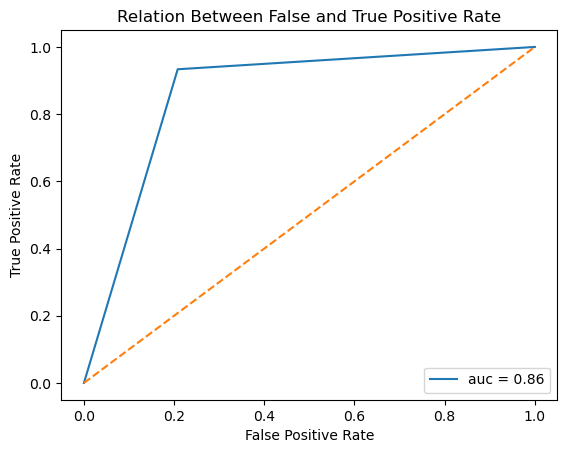

In [108]:
print('accuracy score of fpr , tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
plt.plot(fpr,tpr, label='auc = {:.2f}'.format(roc_auc_score(y_test,y_pred)))
plt.plot([0,1],[0,1],linestyle='--' )
plt.title('Relation Between False and True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Prediction

In [109]:
predict = pd.DataFrame()
predict['actual'] = y_test
predict['predicted'] = y_pred
predict

actual  predicted
1316       0          1
5164       1          1
4399       1          1
29         0          0
3780       1          1
...      ...        ...
1786       0          1
279        0          0
1160       0          0
4538       1          1
3037       0          0

[1590 rows x 2 columns]

# Model predicting rainfall average

In [110]:
# in Rainfall case we will drop column Humidity3pm because of multicollinearity
x2 = df2.drop(['Rainfall','Humidity3pm'] , axis=1)
y2 = df2['Rainfall']

In [111]:
s_scaler = scaler.fit_transform(x2)
x_scaling = pd.DataFrame(s_scaler,columns=x2.columns)
x_scaling

Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0    -1.236229  0.260808 -0.199247     0.136063 -0.374436     1.280329   
1    -1.236229 -0.826838  0.192326     0.136063 -0.374436     1.467305   
2    -1.236229  0.170171  0.299118     0.136063 -0.374436     1.654282   
3    -1.236229 -0.500544  0.708489     0.136063 -0.374436    -0.402461   
4    -1.236229  1.004032  1.473835     0.136063 -0.374436     1.280329   
...        ...       ...       ...          ...       ...          ...   
3117  1.183714 -1.660699 -0.110253     0.136063 -0.374436    -1.150367   
3118  1.183714 -1.515680  0.227923     0.136063 -0.374436    -0.028508   
3119  1.183714 -1.189386  0.512703     0.136063 -0.374436    -0.589437   
3120  1.183714 -0.754328  0.530502     0.136063 -0.374436     0.532422   
3121  1.183714  0.532719 -0.092454     0.136063 -0.374436    -1.150367   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure3pm  \
0          0.873868    1.422816    1.454149      1.021038  ...    -1.858449   
1          0.873868   -0.199124    1.687034     -0.203762  ...    -1.707287   
2          1.065382    1.422816    1.687034      0.971030  ...    -1.512935   
3         -1.041274    0.495993   -1.806236      0.488049  ...    -0.627557   
4          0.586597   -1.357653   -0.176044      0.150012  ...    -2.095989   
...             ...         ...         ...           ...  ...          ...   
3117      -0.370974    0.495993   -1.573352      0.626453  ...     0.992037   
3118      -1.232788    0.495993   -1.107582      0.626453  ...     0.732902   
3119       0.203568    0.495993    1.454149      0.331668  ...     0.236226   
3120      -0.658246    0.727699   -1.107582      0.626453  ...     0.171442   
3121       0.203568   -1.125948   -1.340467      0.865483  ...     0.473767   

      Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  \
0     1.035994  0.688026 -0.034210 -0.174545  -0.232417     -0.422035   
1     0.670239  0.688026  0.020449  0.282657  -0.232417     -0.422035   
2     0.670239 -1.267561  0.712797  0.081488  -0.232417     -0.422035   
3     0.670239  0.688026  0.184426  0.684995  -0.232417     -0.422035   
4     0.670239  1.079143  0.129767  1.270214  -0.232417     -0.422035   
...        ...       ...       ...       ...        ...           ...   
3117  0.670239  0.688026 -1.273149 -0.064817  -0.232417     -0.422035   
3118  0.670239  0.688026 -1.127391  0.319233  -0.232417     -0.422035   
3119  0.670239  0.688026 -0.835876  0.611843  -0.232417     -0.422035   
3120 -0.792782 -1.267561 -0.362164  0.593555  -0.232417     -0.422035   
3121  1.035994  1.079143 -0.380384 -0.339138  -0.232417     -0.422035   

          year     month       day  
0    -1.740927  1.714685 -1.661024  
1    -1.740927  1.714685 -1.547367  
2    -1.740927  1.714685 -1.433710  
3    -1.740927  1.714685 -1.320053  
4    -1.740927  1.714685 -1.206396  
...        ...       ...       ...  
3117  1.858261 -0.145696  0.612117  
3118  1.858261 -0.145696  0.725774  
3119  1.858261 -0.145696  0.839431  
3120  1.858261 -0.145696  0.953088  
3121  1.858261 -0.145696  1.066745  

[3122 rows x 23 columns]

# check variance inflation factor

In [112]:
viff = pd.DataFrame()
viff['vif'] = [variance_inflation_factor(x_scaling.values , i) for i in range(len(x_scaling.columns))]
viff['column'] = x_scaling.columns
viff

vif         column
0    1.764417       Location
1    9.175083        MinTemp
2   21.149668        MaxTemp
3    1.113288    Evaporation
4    1.631515       Sunshine
5    1.646508    WindGustDir
6    1.879672  WindGustSpeed
7    1.380066     WindDir9am
8    1.420170     WindDir3pm
9    1.830255   WindSpeed9am
10   1.758739   WindSpeed3pm
11   1.986622    Humidity9am
12  17.483716    Pressure9am
13  16.739493    Pressure3pm
14   1.965897       Cloud9am
15   1.805929       Cloud3pm
16  13.041527        Temp9am
17  18.861745        Temp3pm
18   1.070320      RainToday
19   1.201274   RainTomorrow
20   1.686196           year
21   1.152371          month
22   1.006165            day

There is multicollinearity problem so we will use the best columns of correlation

In [113]:
pca = PCA()
pca.fit_transform(x_scaling)

array([[ 1.14700734e+00,  4.48915532e-01,  3.90116345e+00, ...,
         6.02571515e-02,  1.61870409e-01, -1.19008537e-01],
       [ 9.55572129e-01,  6.49442962e-01,  2.97747451e+00, ...,
        -2.64258222e-01, -5.72195597e-02, -1.12810129e-01],
       [ 2.26758939e+00,  2.12852937e+00,  3.58051698e+00, ...,
        -2.01893365e-01,  4.56448915e-01, -3.38295546e-02],
       ...,
       [-4.58928617e-01, -6.72284151e-01,  2.76287846e-01, ...,
         6.79917069e-02, -1.33057635e-01,  7.77006423e-02],
       [ 1.67920785e-01,  6.40024367e-01, -1.12084525e+00, ...,
         7.88997840e-02,  1.12702278e-01,  4.18702124e-02],
       [ 2.58220781e-03, -1.64420586e+00, -5.05876946e-01, ...,
         5.29928745e-01,  1.35274507e-01,  2.32137409e-01]])

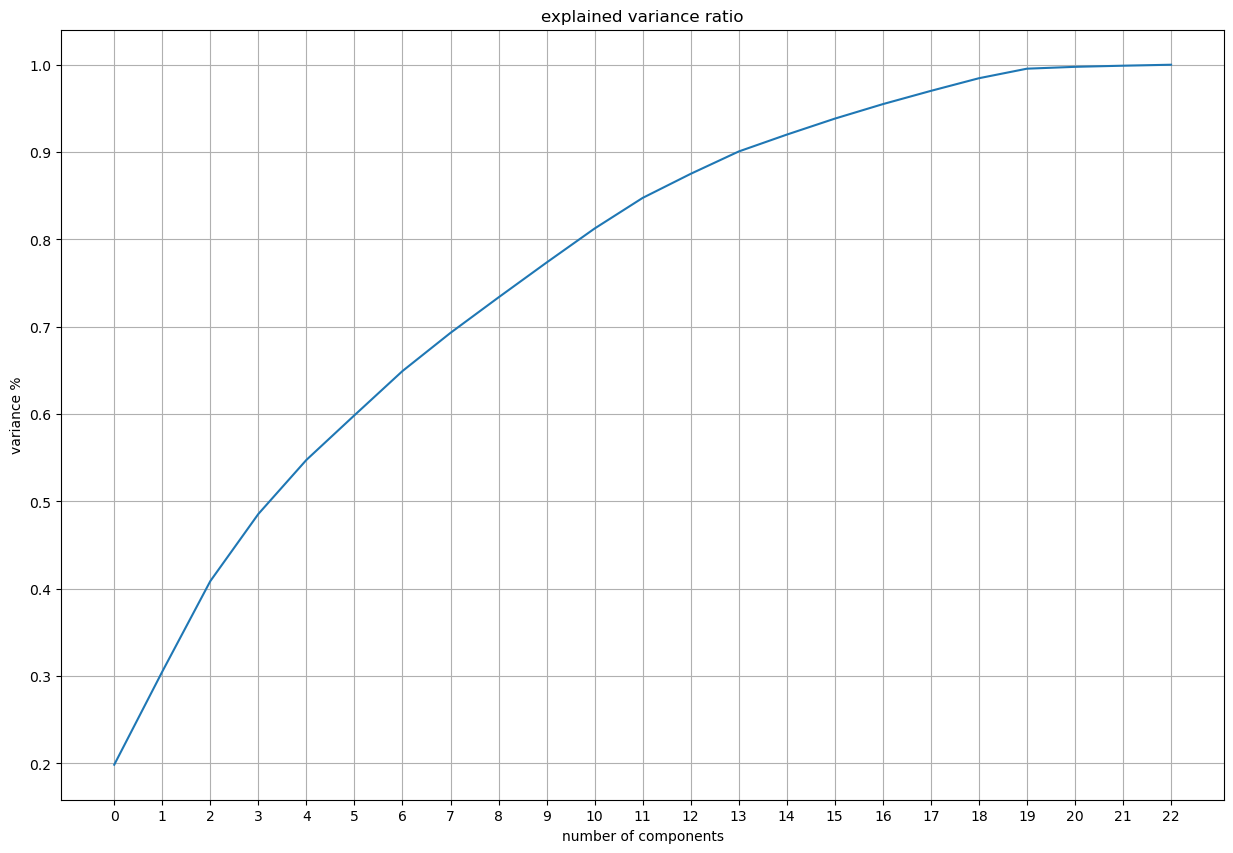

In [114]:
#now let us see on the screen t get the best components
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('variance %')
plt.title('explained variance ratio')
plt.grid(axis='both')
plt.xticks(np.arange(0,23,1))
plt.show()

at number of components 16 we have variance of 95 %

In [115]:
pca = PCA(n_components=16)
new_co  = pca.fit_transform(x_scaling)
component = pd.DataFrame(new_co , columns=np.arange(16))
component

0         1         2         3         4         5         6   \
0     1.147007  0.448916  3.901163 -2.263605 -0.947095 -0.982267 -0.126314   
1     0.955572  0.649443  2.977475 -2.665800 -0.867051 -2.242442 -0.463710   
2     2.267589  2.128529  3.580517 -2.137785 -0.987741 -1.204801 -0.486703   
3     0.487878  0.528939 -0.190326 -1.842643  0.892297 -2.088409  1.091466   
4     2.242839 -1.036708  1.329417 -2.746723 -0.355201 -1.865737  0.816582   
...        ...       ...       ...       ...       ...       ...       ...   
3117 -1.615288 -0.438283 -0.866619  2.419584  1.045619 -0.825930 -0.713148   
3118 -1.432704 -0.545425 -0.690588  1.577313  1.316772 -0.234888 -1.342364   
3119 -0.458929 -0.672284  0.276288  1.273841  0.495093 -0.239655 -2.246473   
3120  0.167921  0.640024 -1.120845  1.319252  0.006367  0.524488 -1.544949   
3121  0.002582 -1.644206 -0.505877  2.425537  0.740027 -0.980359 -0.086718   

            7         8         9         10        11        12        13  \
0     1.468915 -0.287468  0.051398 -0.715567 -0.527047  0.249840 -1.542151   
1     0.877336  0.477353 -0.697883 -0.928868  0.306371  0.242064  0.155412   
2     1.013153  0.122058 -0.009739 -0.891521  0.249613 -0.270481 -0.918460   
3     1.761601 -0.580427  1.756639 -1.104022 -0.882384 -0.342697  0.398892   
4     0.915763  0.411512 -0.640766 -0.716757 -0.763884  1.634497 -0.798272   
...        ...       ...       ...       ...       ...       ...       ...   
3117 -0.198263 -0.592614  1.570466 -0.020784 -0.646653 -0.786282  1.387337   
3118 -0.286470 -0.502078  1.743155 -0.138178 -0.478221  0.019230  1.388340   
3119 -0.927859  0.283793  0.703840 -0.359325  0.736503 -0.721152  1.016746   
3120 -0.691780 -0.429113  1.631369 -0.280175 -0.188092 -0.253742  0.989960   
3121 -0.819091 -0.199116  0.670293  0.227319 -0.964031  0.020639  0.970932   

            14        15  
0    -0.173671 -0.553568  
1    -0.140858  0.360648  
2     0.886053  0.215101  
3     0.273920  0.279796  
4     0.222712 -0.072160  
...        ...       ...  
3117 -0.455569  0.533372  
3118 -0.073746  0.608251  
3119 -0.601730 -0.380361  
3120  1.111540  1.237825  
3121 -0.247322 -0.603587  

[3122 rows x 16 columns]

In [116]:
#now let us recheck multicollinearity
viff = pd.DataFrame()
viff['vif'] = [variance_inflation_factor(component.values , i) for i in range(len(component.columns))]
viff['column'] = component.columns
viff

vif  column
0   1.0       0
1   1.0       1
2   1.0       2
3   1.0       3
4   1.0       4
5   1.0       5
6   1.0       6
7   1.0       7
8   1.0       8
9   1.0       9
10  1.0      10
11  1.0      11
12  1.0      12
13  1.0      13
14  1.0      14
15  1.0      15

we have solved multicollinearity problem

# Building model

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso , Ridge
from sklearn.svm import SVR

In [118]:
accuracy = []
stats = []
lr = LinearRegression()
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(component,y2,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    accu = r2_score(y_test,y_pred)
    accuracy.append(accu)
    stats.append(i)

In [119]:
accur = pd.DataFrame()
accur['accuracy'] = accuracy
accur['no of stats'] = stats
accur[accur['accuracy'] == accur['accuracy'].max()]

accuracy  no of stats
10  0.839648           11

the best accuracy is 83 % when number of stats is 11

In [120]:
x_train,x_test,y_train,y_test = train_test_split(component,y2,test_size=0.25,random_state=21)

In [121]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
et = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
las = Lasso()
ri = Ridge()
svr = SVR()
ada = AdaBoostRegressor()

In [122]:
models = {'LinearRegression':lr ,'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr ,'AdaBoostRegresso':ada  }

for name , m in models.items():
    m.fit(x_train,y_train)
    y_pred= m.predict(x_test)
    y_pred_train = m.predict(x_train)
    accuracy = r2_score(y_test,y_pred)
    accuracy_train = r2_score(y_train,y_pred_train)
    print('model is ',name)
    print('accuracy test score is : ','{:.2f}'.format(accuracy*100),' %')
    print('accuracy train score is : ','{:.2f}'.format(accuracy_train*100),' %')
    print('mean absolute error ',mean_absolute_error(y_test,y_pred))
    print('mean squared error ',mean_squared_error(y_test,y_pred))
    print('root mean squared error ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

model is  LinearRegression
accuracy test score is :  83.46  %
accuracy train score is :  74.70  %
mean absolute error  0.10590892071468148
mean squared error  0.028676954266827894
root mean squared error  0.1693427124703862


model is  RandomForestRegressor
accuracy test score is :  79.43  %
accuracy train score is :  95.93  %
mean absolute error  0.11296030729833544
mean squared error  0.03566115492957746
root mean squared error  0.18884161334191535


model is  GradientBoostingRegressor
accuracy test score is :  80.07  %
accuracy train score is :  83.56  %
mean absolute error  0.1101004629092113
mean squared error  0.03454622003168516
root mean squared error  0.18586613470905655


model is  ExtraTreesRegressor
accuracy test score is :  81.73  %
accuracy train score is :  100.00  %
mean absolute error  0.10954545454545452
mean squared error  0.031667038412291924
root mean squared error  0.1779523487124908


model is  DecisionTreeRegressor
accuracy test score is :  53.84  %
accuracy tra

Linear regression is the best accuracy with the highest mean

In [123]:
models = {'LinearRegression':lr ,'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr ,'AdaBoostRegresso':ada  }

for name , m in models.items():
    print('models is ',name)
    score = cross_val_score(m,component,y2,cv=3)
    mean = score.mean()
    print('score: ',score)
    print('mean: ',mean)
    print('Difference between accuracy scre and mean is ',r2_score(y_test,m.predict(x_test)) - mean)
    print('\n')

models is  LinearRegression
score:  [0.79348282 0.71705191 0.79946703]
mean:  0.770000587879139
Difference between accuracy scre and mean is  0.06456869301820012


models is  RandomForestRegressor
score:  [0.61692466 0.67973074 0.74859713]
mean:  0.681750841221127
Difference between accuracy scre and mean is  0.11252820078803105


models is  GradientBoostingRegressor
score:  [0.64285138 0.67059564 0.76563745]
mean:  0.6930281584319316
Difference between accuracy scre and mean is  0.10768268523212998


models is  ExtraTreesRegressor
score:  [0.75343099 0.70070985 0.77742782]
mean:  0.7438562186894275
Difference between accuracy scre and mean is  0.07346395807505846


models is  DecisionTreeRegressor
score:  [0.29978271 0.49087369 0.44200527]
mean:  0.41088722379877957
Difference between accuracy scre and mean is  0.12746354430988144


models is  KNeighborsRegressor
score:  [0.7420142  0.6803114  0.76521314]
mean:  0.7291795787365377
Difference between accuracy scre and mean is  0.061945

KNeighborsRegressor has a good accuracy and the least difference between accuracy_score and mean score so we will pick it

# HyperParameter

In [134]:
params = {'n_neighbors':[3,4,5,6,10] ,'weights':['uniform','distance']}

In [135]:
knn_new = GridSearchCV(estimator= KNeighborsRegressor() ,param_grid=params,scoring='r2')
knn_new.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 10],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [136]:
knn_new.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [137]:
final_knn = KNeighborsRegressor(n_neighbors= 10, weights ='distance')

final_knn.fit(x_train,y_train)
y_pred= final_knn.predict(x_test)
y_pred_train = final_knn.predict(x_train)
accuracy = r2_score(y_test,y_pred)
accuracy_train = r2_score(y_train,y_pred_train)
print('accuracy test score is : ','{:.2f}'.format(accuracy*100),' %')
print('accuracy train score is : ','{:.2f}'.format(accuracy_train*100),' %')
print('mean absolute error ',mean_absolute_error(y_test,y_pred))
print('mean squared error ',mean_squared_error(y_test,y_pred))
print('root mean squared error ',np.sqrt(mean_squared_error(y_test,y_pred)))

accuracy test score is :  80.46  %
accuracy train score is :  100.00  %
mean absolute error  0.10077777560934996
mean squared error  0.03386456137504038
root mean squared error  0.1840232631355079


we increased accuracy from 79.11 % t 80.46 %

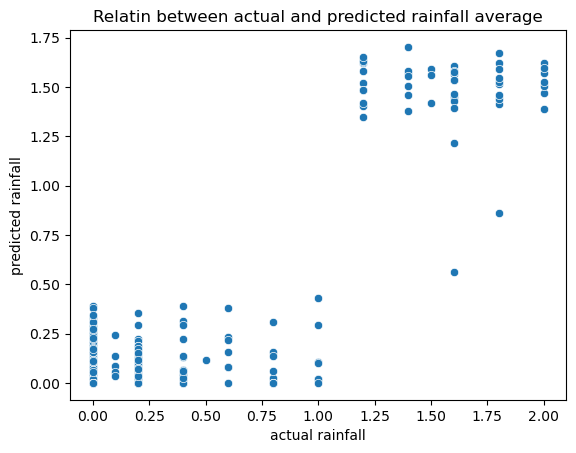

In [139]:
sns.scatterplot(x=y_test , y=final_knn.predict(x_test))
plt.title('Relatin between actual and predicted rainfall average')
plt.xlabel('actual rainfall')
plt.ylabel('predicted rainfall')
plt.show()

# prediction

In [140]:
prediction= pd.DataFrame()
prediction['actual'] = y_test
prediction['prediction'] = y_pred
prediction

actual  prediction
Date                          
2009-05-15     0.0    0.218416
2014-09-13     0.0    0.000000
2012-04-18     0.0    0.000000
2010-05-13     0.0    0.017560
2011-01-25     0.0    0.000000
...            ...         ...
2010-11-10     0.0    0.000000
2012-07-31     0.0    0.000000
2016-07-07     2.0    1.594263
2015-04-02     0.5    0.116002
2009-01-02     0.0    0.171062

[781 rows x 2 columns]